# SURPRISE HOUSING CASE STUDY

This Liner Regrssion model will be built in below steps:

1. EDA, Reading, Understanding & Visualising the data & Perform EDA
2. Preparing the data for modeling
3. Building the Ridge Model
4. Training the model useing Ridge
5. Residual Analysis on Ridge Model
6. Predictions & evaluation on the test set useing - RIDGE 
7. Building the Lasso Model
8. Training the model useing Lasso
9. Residual Analysis on Ridge Model
10. Predictions & evaluation on the test set useing - RIDGE 
11. CONCLUSIONS

In [1]:
# Import Libraries for the model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

## <span style='color:BLUE'> STEP 1 - Reading, Understanding, Visualising & Perform EDA.  </span>
- Importing the dataset
- Looking for NAN Values & Datatypes in the dataset
- Dropping columns that are irrelevant
- Outlier detection and elimination for continuous variables columns
- Visualizing numeric/continuous variables
- Visualizing categorical variables

In [2]:
## Read the original dataset:
house=pd.read_csv("train.csv")
print("Dataset Shape: {}".format(house.shape))
house.head()

Dataset Shape: (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# To Understand "Datatypes in each columns"
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# To Understand "NaN values in all continous varilable coloumns" 
house[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']].isnull().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [5]:
# To Understand "NaN values in all categorical varilable coloumns"
house[['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']].isnull().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondit

In [6]:
# To fill a specific continous coloumn which has NAN values with forward values
house['GarageYrBlt']= house['GarageYrBlt'].fillna(method="ffill")
house['LotFrontage']= house['LotFrontage'].fillna(method="ffill")

In [7]:
# To fill a specific continous coloumn which has NAN values with MEAN values of the coloumns
house['MasVnrArea'].fillna((house['MasVnrArea'].mean()), inplace=True)

In [8]:
# To fill a specific categorical coloumn which has NAN values with forward values
cat_nan=['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
house[cat_nan]=house[cat_nan].fillna('No')

In [9]:
# To covert Predictor Variable - "Sale Price" column values to Log & Natural Logarrithmatic Value (base10)
house['Saleprice']=np.log10(house['SalePrice'])

In [10]:
# To drop columns that are irrelevant:
house.drop(['Id', 'SalePrice'], inplace=True, axis=1)

<AxesSubplot:>

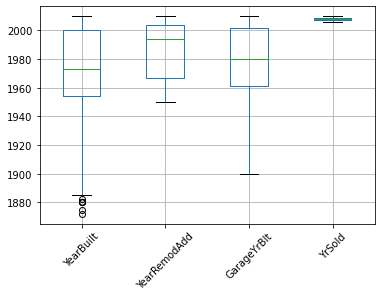

In [11]:
# To determine outliers in continuous varibale columns useing box plots:
house.boxplot(column=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', "YrSold"], rot=45)

<AxesSubplot:>

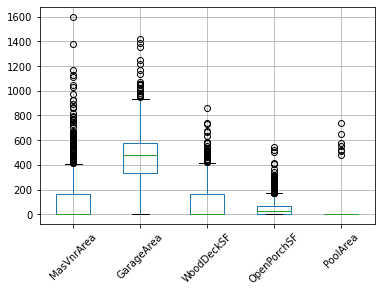

In [12]:
# To determine outliers in continuous varibale columns useing box plots:
house.boxplot(column=['MasVnrArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea'], rot=45)

<AxesSubplot:>

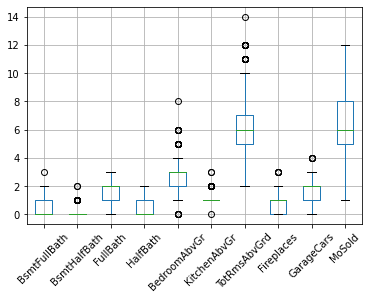

In [13]:
# To determine outliers in continuous varibale columns useing box plots:
house.boxplot(column=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold'], rot=45)

### *** -IMP- *** - Only a few boxplot for outlier detection has been displayed, rest anlysis has been done in the background.

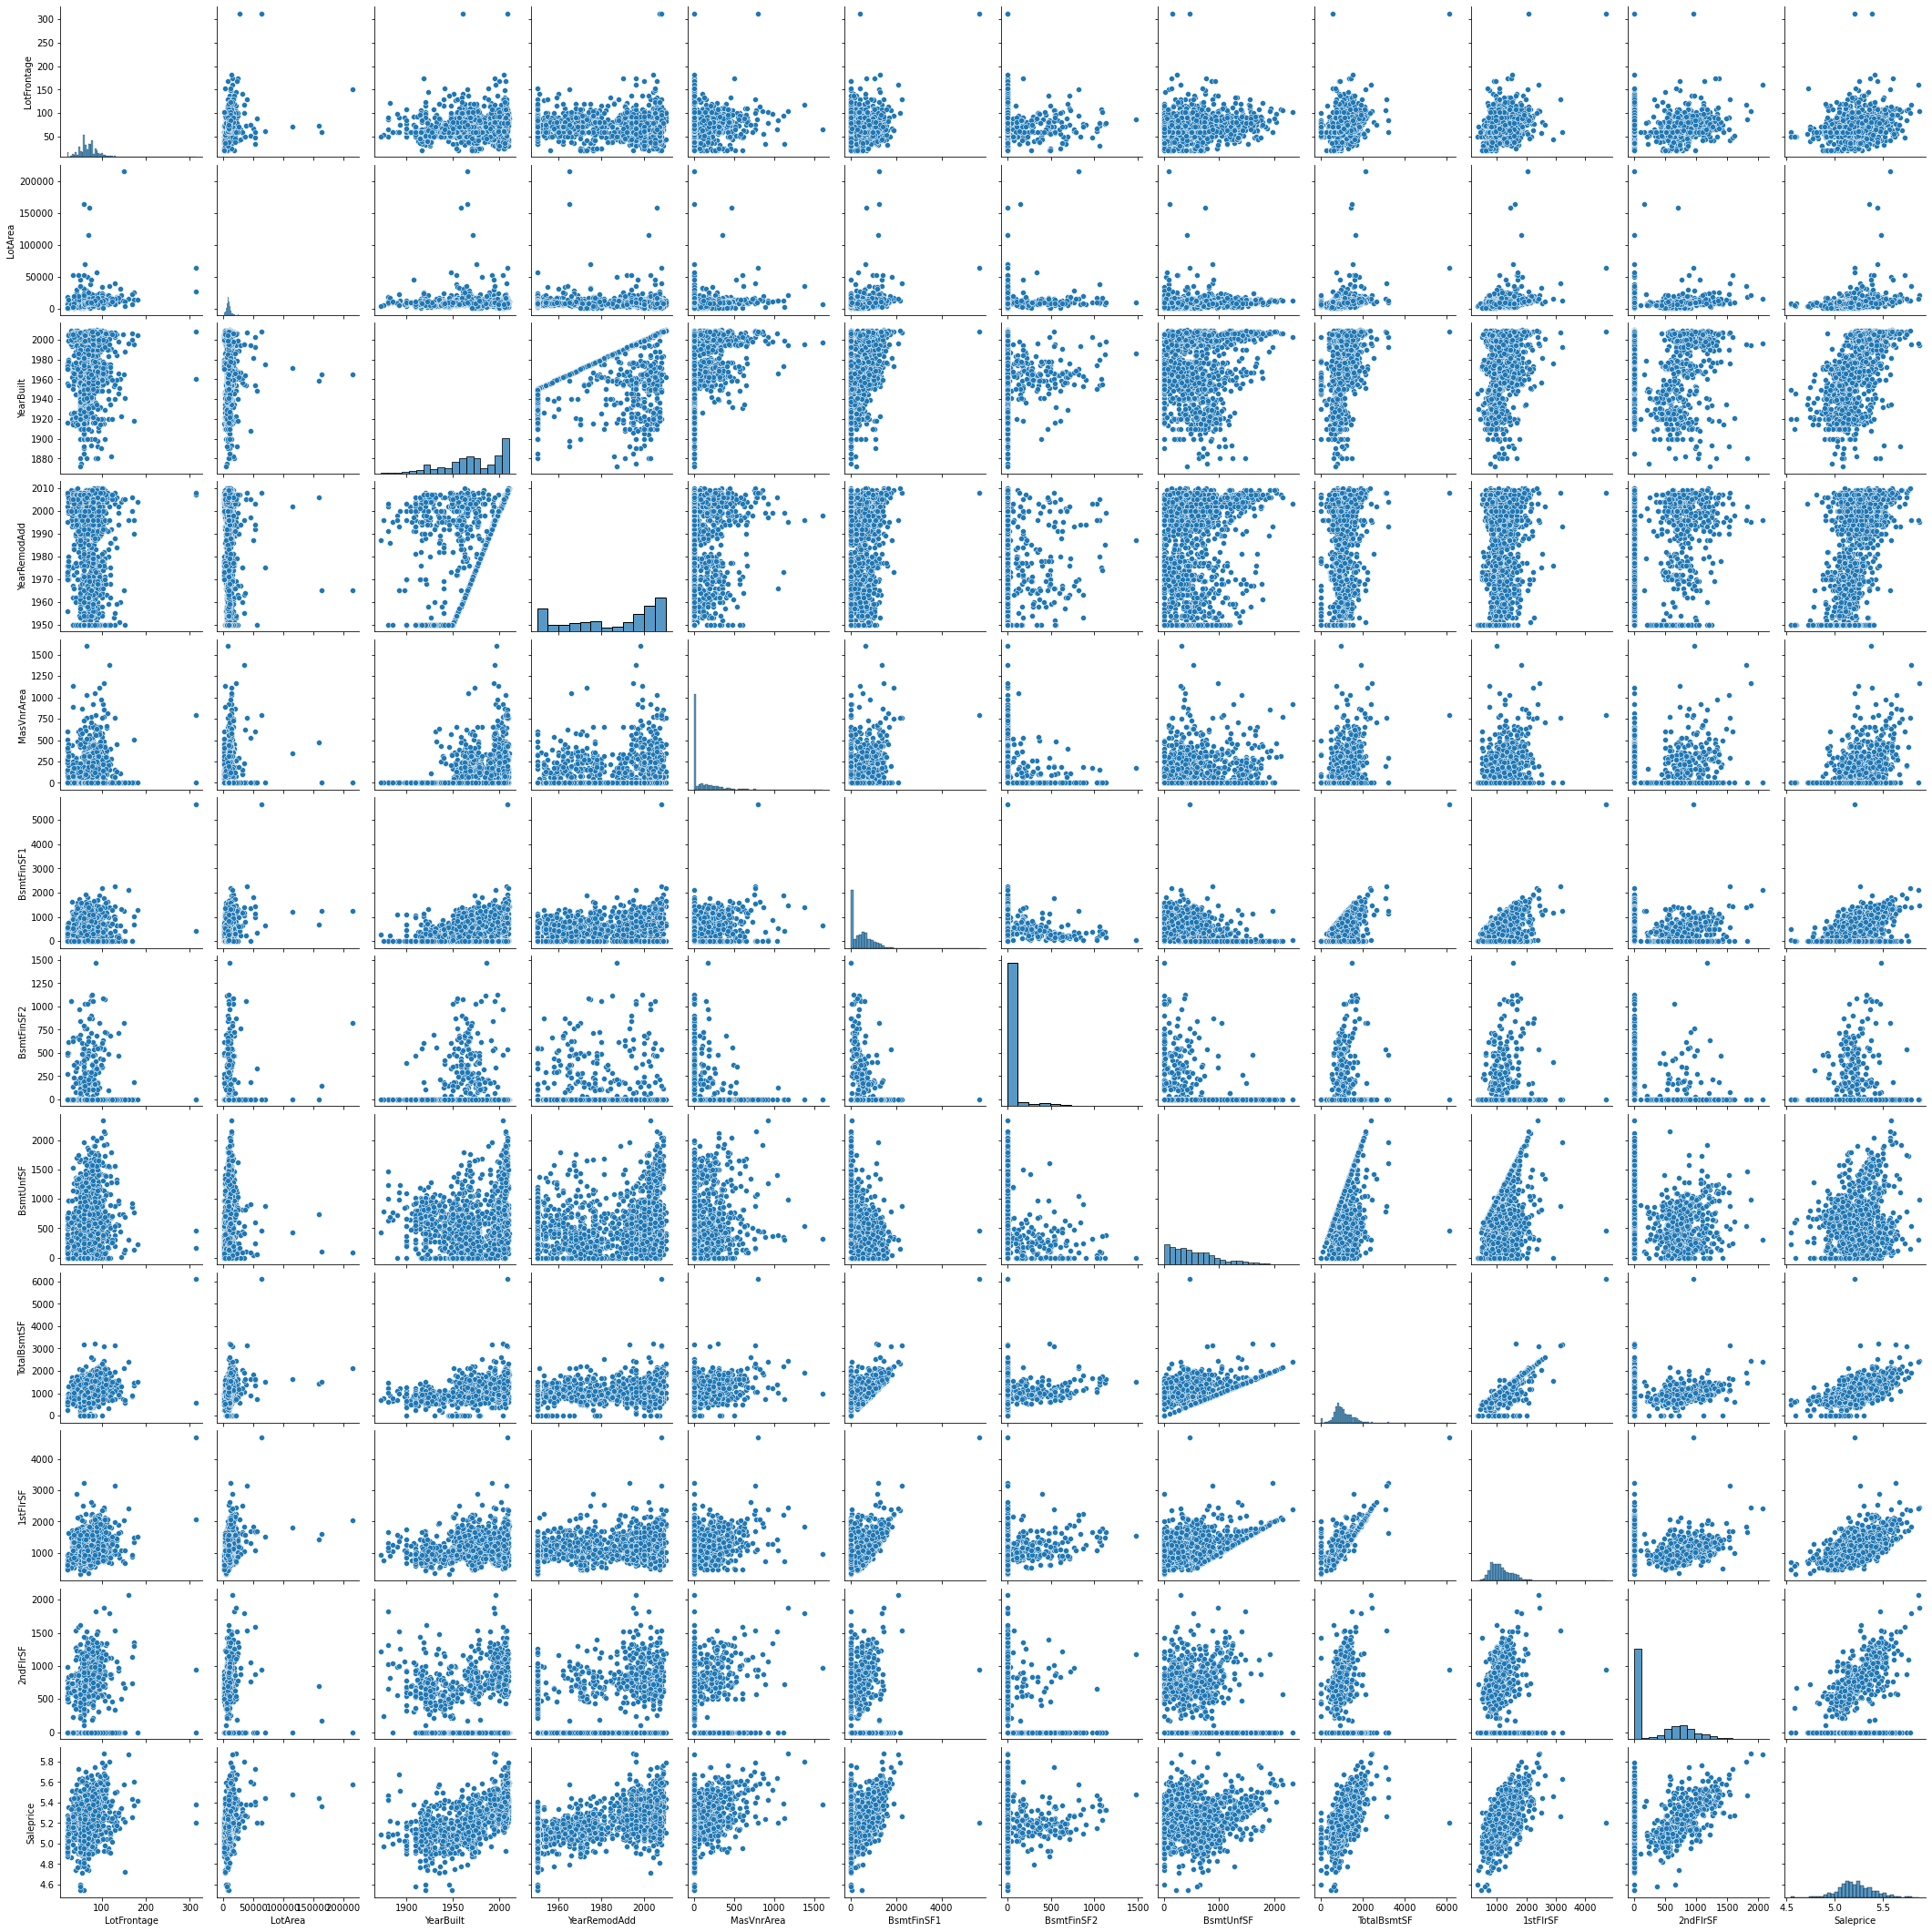

In [14]:
# To visualise Continous Variables and their relationship with SalePrice:
sns.pairplot(house, x_vars=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Saleprice'], y_vars=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Saleprice'])

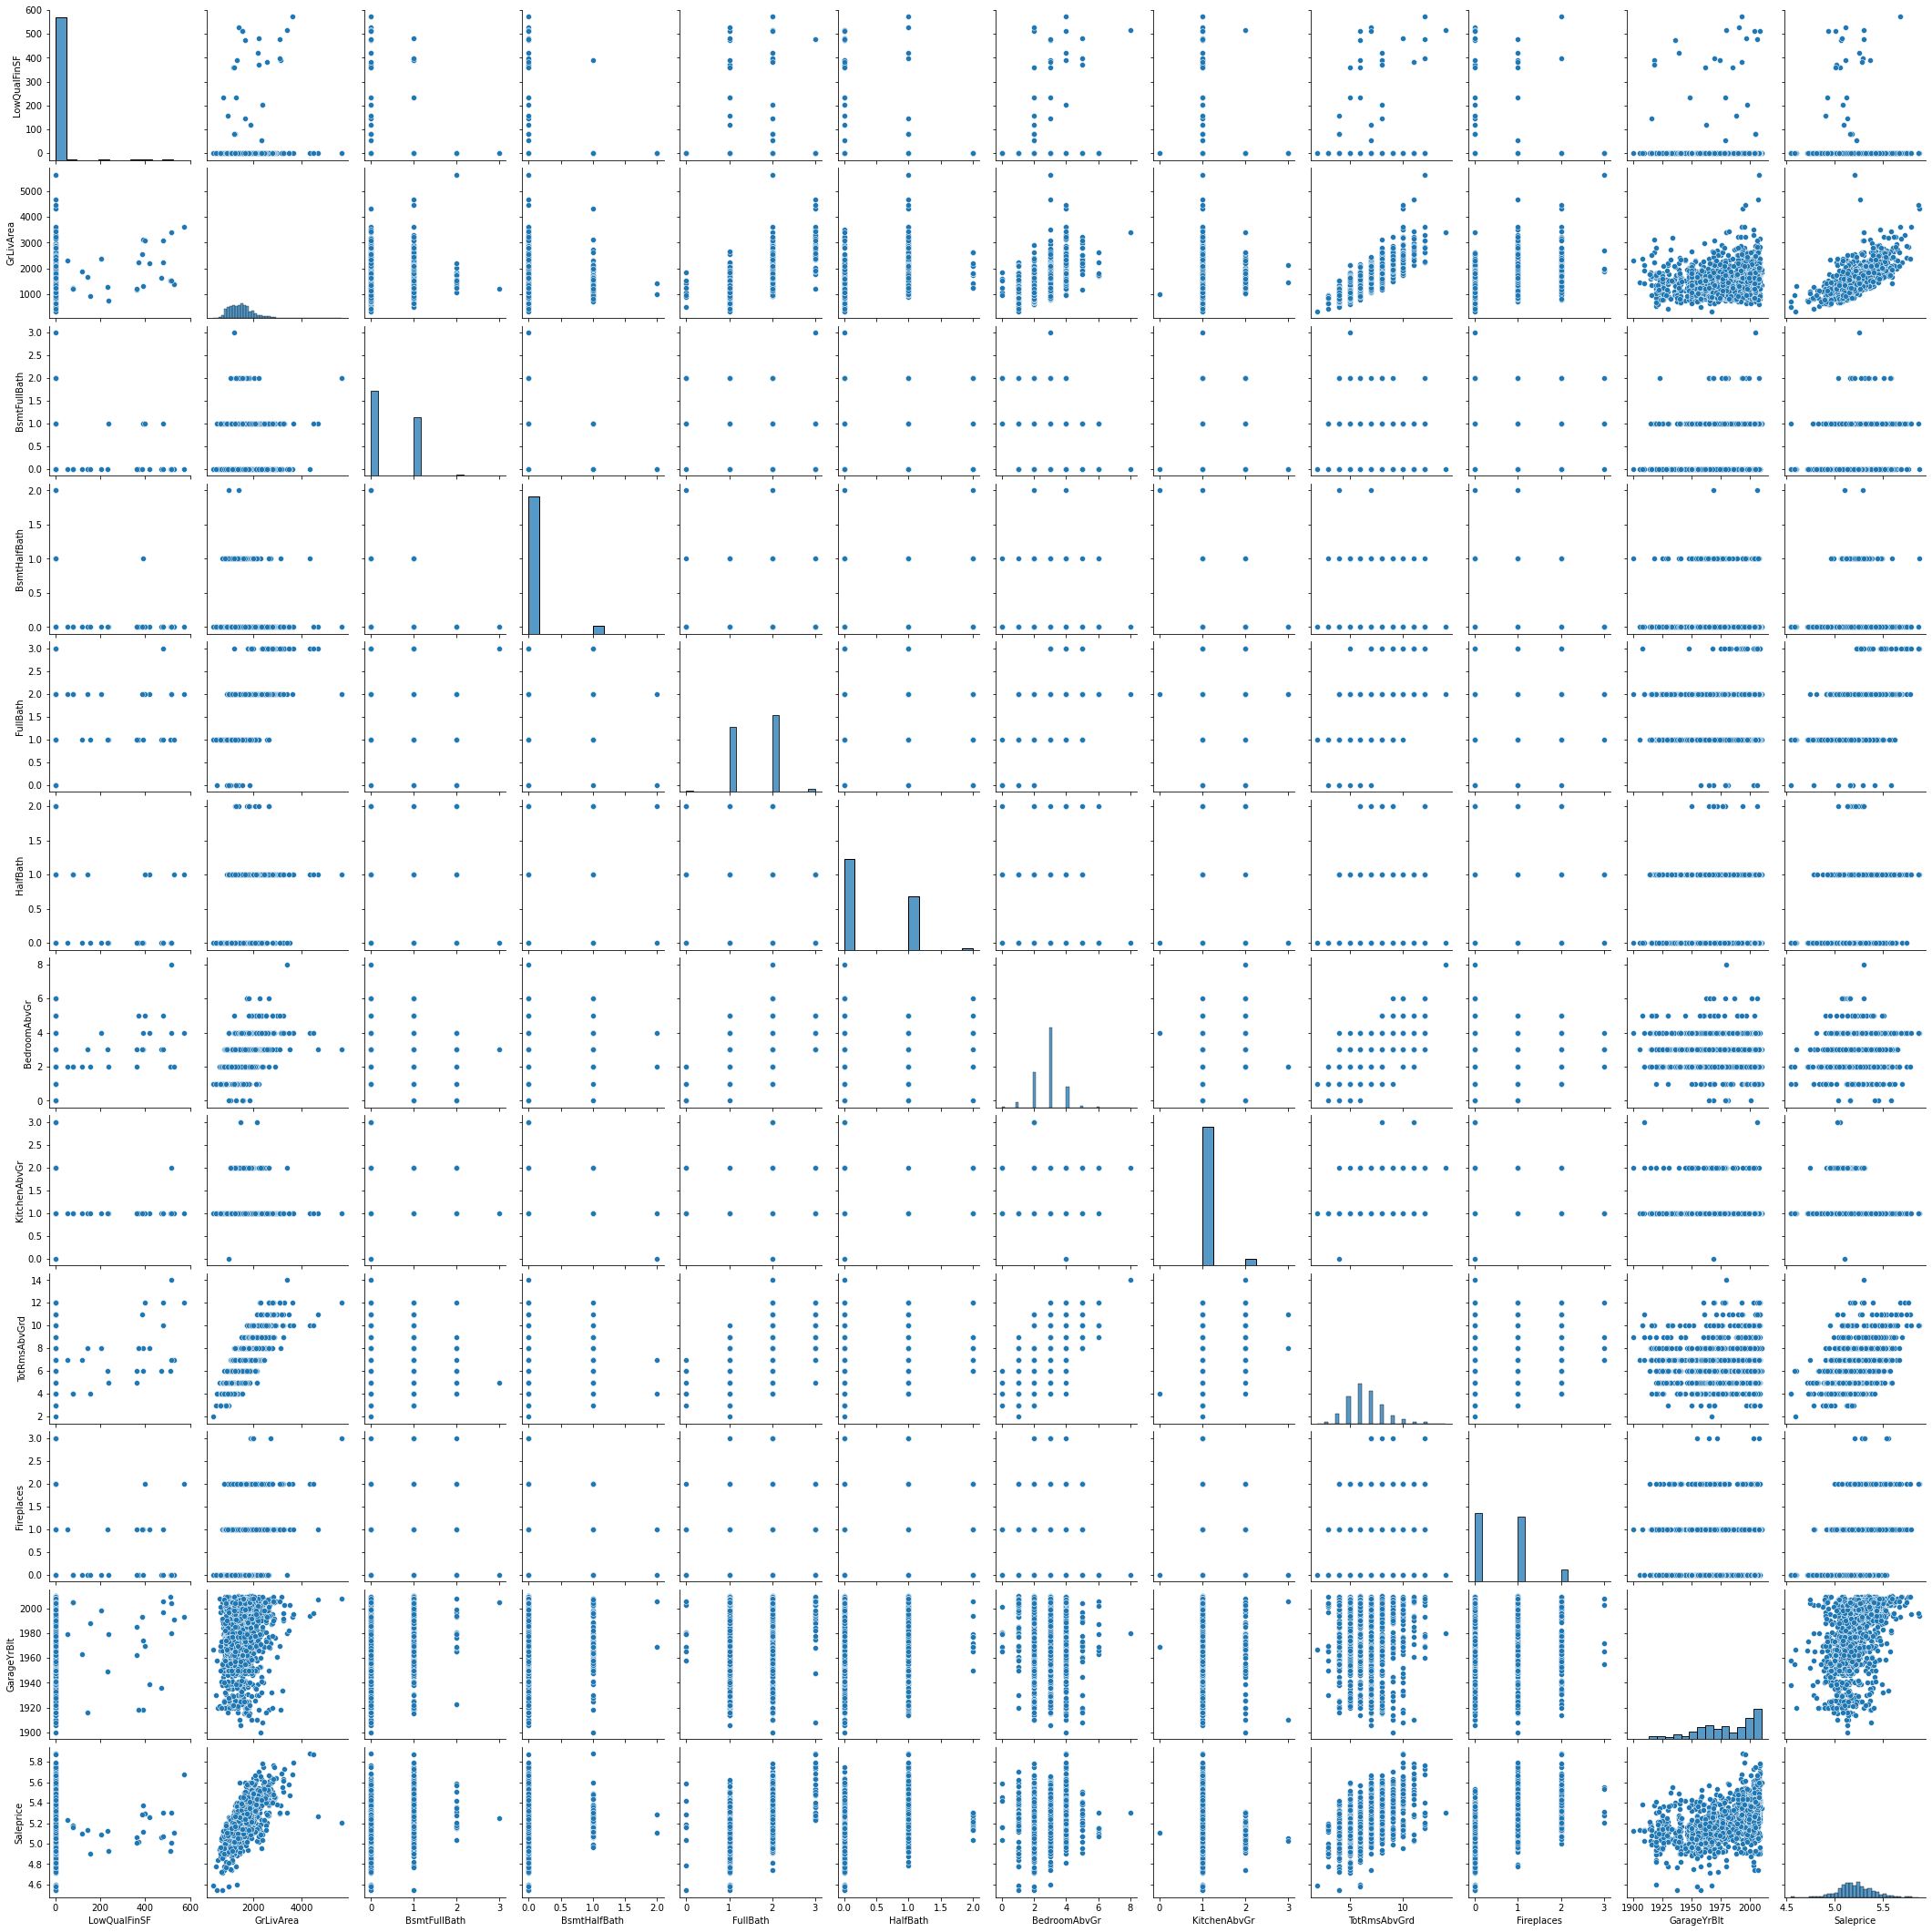

In [15]:
# To visualise Continous Variables and their relationship with SalePrice:
sns.pairplot(house, x_vars=[ 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'Saleprice'], y_vars=['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'Saleprice'])

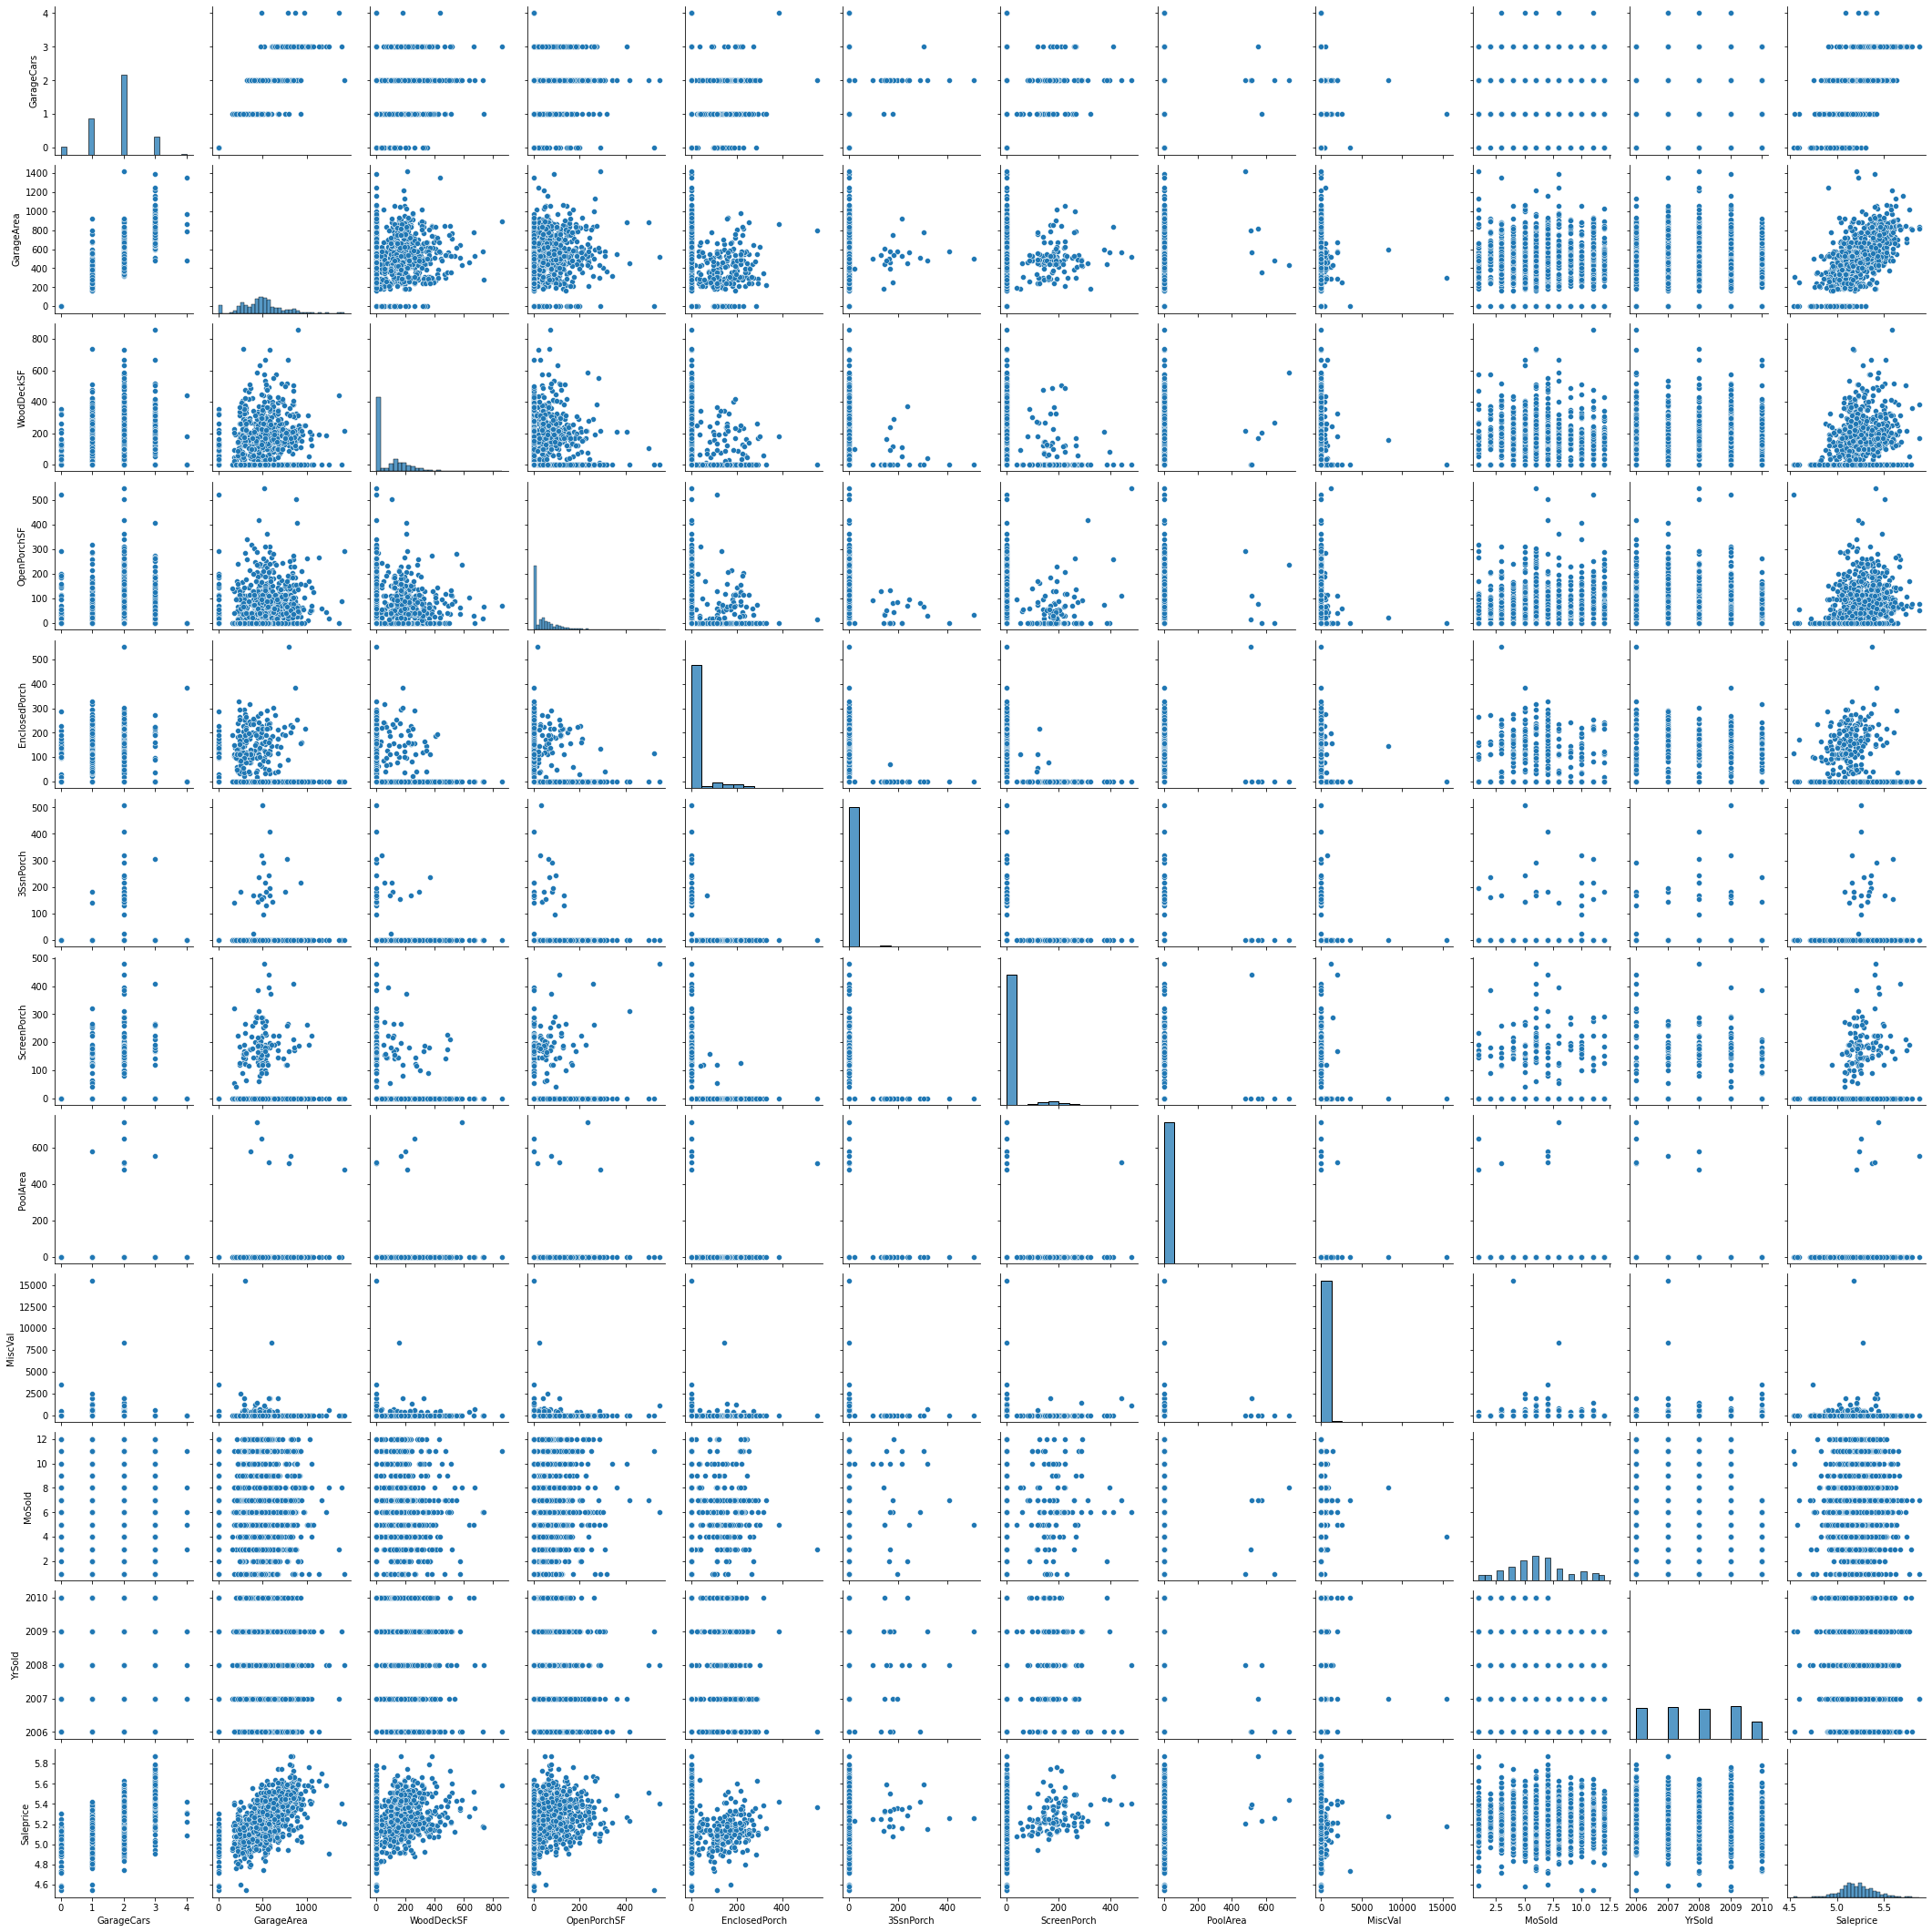

In [16]:
# To visualise Continous Variables and their relationship with SalePrice:
sns.pairplot(house, x_vars=['GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Saleprice'], y_vars=['GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Saleprice'])

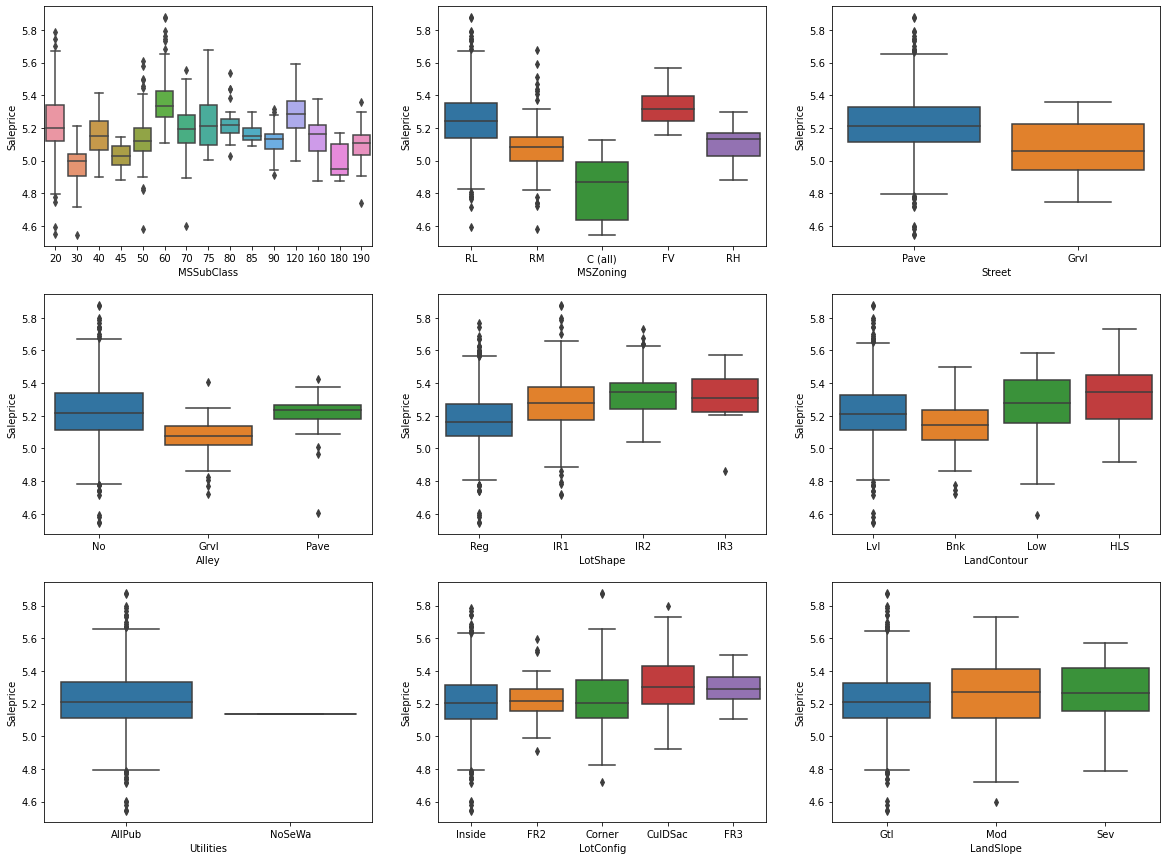

In [17]:
# To visualise Categorical Variables and their relationship:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='MSSubClass', y='Saleprice', data=house)
plt.subplot(3,3,2)
sns.boxplot(x='MSZoning', y='Saleprice', data=house)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y='Saleprice', data=house)
plt.subplot(3,3,4)
sns.boxplot(x='Alley', y='Saleprice', data=house)
plt.subplot(3,3,5)
sns.boxplot(x='LotShape', y='Saleprice', data=house)
plt.subplot(3,3,6)
sns.boxplot(x='LandContour', y='Saleprice', data=house)
plt.subplot(3,3,7)
sns.boxplot(x='Utilities', y='Saleprice', data=house)
plt.subplot(3,3,8)
sns.boxplot(x='LotConfig', y='Saleprice', data=house)
plt.subplot(3,3,9)
sns.boxplot(x='LandSlope', y='Saleprice', data=house)
plt.show()
##* -IMP- * - Only a few boxplot for outlier detection has been displayed, rest anlysis has been done in the background.

## <span style='color:BLUE'> STEP 2 - Preparing the Data for modeling </span>
- Encoding:
    - Converting continus to categorical variables
    - Creating Dummy Variables with the categorical variables
    - Deleting unwanted columns after creating dummy variables out of it.
- Splitting into train and test
- Rescalling of variables
- Creating X-Train & Y-Train

### <span style='color:RED'> -- Encoding: </span>

In [18]:
# Converting the coded format of columns to Data Dictionary format:
def MS_SubClass_map(x):
    dict_MS_SubClass= {20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED ATTIC ALL AGES', 45:'1-1/2 STORY - UNFINISHED ALL AGES', 50:'1-1/2 STORY FINISHED ALL AGES', 60:'2-STORY 1946 & NEWER', 70:'2-STORY 1945 & OLDER', 75:'2-1/2 STORY ALL AGES', 80:'SPLIT OR MULTI-LEVEL', 85:'SPLIT FOYER', 90:'DUPLEX - ALL STYLES AND AGES', 120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 150:'1-1/2 STORY PUD - ALL AGES', 160:'2-STORY PUD - 1946 & NEWER', 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}
    return dict_MS_SubClass[x]
house['MSSubClass'] = house['MSSubClass'].apply(MS_SubClass_map)

In [19]:
# Creating Dummy Variables for "MSSubClass" - column:
MSSubClass=pd.get_dummies(house['MSSubClass'], drop_first=True)
MSSubClass.head()

1-1/2 STORY FINISHED ALL AGES  1-STORY 1945 & OLDER  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   

   1-STORY 1946 & NEWER ALL STYLES  \
0                                0   
1                                1   
2                                0   
3                                0   
4                                0   

   1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   1-STORY W/FINISHED ATTIC ALL AGES  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   2 FAMILY CONVERSION - ALL STYLES AND AGES  2-1/2 STORY ALL AGES  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   2-STORY 1945 & OLDER  2-STORY 1946 & NEWER  2-STORY PUD - 1946 & NEWER  \
0                     0                     1                           0   
1                     0                     0                           0   
2                     0                     1                           0   
3                     1                     0                           0   
4                     0                     1                           0   

   DUPLEX - ALL STYLES AND AGES  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  \
0                             0                                        0   
1                             0                                        0   
2                             0                                        0   
3                             0                                        0   
4                             0                                        0   

   SPLIT FOYER  SPLIT OR MULTI-LEVEL  
0            0                     0  
1            0                     0  
2            0                     0  
3            0                     0  
4            0                     0

In [20]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, MSSubClass], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities LotConfig  ...  \
0    No      Reg         Lvl    AllPub    Inside  ...   
1    No      Reg         Lvl    AllPub       FR2  ...   
2    No      IR1         Lvl    AllPub    Inside  ...   
3    No      IR1         Lvl    AllPub    Corner  ...   
4    No      IR1         Lvl    AllPub       FR2  ...   

  1-STORY W/FINISHED ATTIC ALL AGES 2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                 0                                         0   
1                                 0                                         0   
2                                 0                                         0   
3                                 0                                         0   
4                                 0                                         0   

  2-1/2 STORY ALL AGES 2-STORY 1945 & OLDER 2-STORY 1946 & NEWER  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    1                    0   
4                    0                    0                    1   

  2-STORY PUD - 1946 & NEWER  DUPLEX - ALL STYLES AND AGES  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  SPLIT FOYER  SPLIT OR MULTI-LEVEL  
0                                        0            0                     0  
1                                        0            0                     0  
2                                        0            0                     0  
3                                        0            0                     0  
4                                        0            0                     0  

[5 rows x 94 columns]

In [21]:
# Converting the coded format of columns to Data Dictionary format:
def Str_eet_map(x):
    dict_Str_eet= {"Grvl": 'Gravel_Street', "Pave": 'Pave_Street'}
    return dict_Str_eet[x]
house['Street'] = house['Street'].apply(Str_eet_map)

In [22]:
# Creating Dummy Variables for "Street" - column:
Street=pd.get_dummies(house['Street'], drop_first=True)
Street.head()

Pave_Street
0            1
1            1
2            1
3            1
4            1

In [23]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Street], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street Alley LotShape LandContour Utilities LotConfig  ...  \
0  Pave_Street    No      Reg         Lvl    AllPub    Inside  ...   
1  Pave_Street    No      Reg         Lvl    AllPub       FR2  ...   
2  Pave_Street    No      IR1         Lvl    AllPub    Inside  ...   
3  Pave_Street    No      IR1         Lvl    AllPub    Corner  ...   
4  Pave_Street    No      IR1         Lvl    AllPub       FR2  ...   

  2 FAMILY CONVERSION - ALL STYLES AND AGES 2-1/2 STORY ALL AGES  \
0                                         0                    0   
1                                         0                    0   
2                                         0                    0   
3                                         0                    0   
4                                         0                    0   

  2-STORY 1945 & OLDER 2-STORY 1946 & NEWER 2-STORY PUD - 1946 & NEWER  \
0                    0                    1                          0   
1                    0                    0                          0   
2                    0                    1                          0   
3                    1                    0                          0   
4                    0                    1                          0   

  DUPLEX - ALL STYLES AND AGES  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  \
0                            0                                        0   
1                            0                                        0   
2                            0                                        0   
3                            0                                        0   
4                            0                                        0   

   SPLIT FOYER  SPLIT OR MULTI-LEVEL  Pave_Street  
0            0                     0            1  
1            0                     0            1  
2            0                     0            1  
3            0                     0            1  
4            0                     0            1  

[5 rows x 95 columns]

In [24]:
# Converting the coded format of columns to Data Dictionary format:
def All_ey_map(x):
    dict_All_ey= {"Grvl": 'Gravel_Alley', "Pave": 'Pave_Alley', "No": 'No Alley Access'}
    return dict_All_ey[x]
house['Alley'] = house['Alley'].apply(All_ey_map)

In [25]:
# Creating Dummy Variables for "Alley" - column:
Alley=pd.get_dummies(house['Alley'], drop_first=True)
Alley.head()

No Alley Access  Pave_Alley
0                1           0
1                1           0
2                1           0
3                1           0
4                1           0

In [26]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Alley], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley LotShape LandContour Utilities LotConfig  ...  \
0  Pave_Street  No Alley Access      Reg         Lvl    AllPub    Inside  ...   
1  Pave_Street  No Alley Access      Reg         Lvl    AllPub       FR2  ...   
2  Pave_Street  No Alley Access      IR1         Lvl    AllPub    Inside  ...   
3  Pave_Street  No Alley Access      IR1         Lvl    AllPub    Corner  ...   
4  Pave_Street  No Alley Access      IR1         Lvl    AllPub       FR2  ...   

  2-STORY 1945 & OLDER 2-STORY 1946 & NEWER 2-STORY PUD - 1946 & NEWER  \
0                    0                    1                          0   
1                    0                    0                          0   
2                    0                    1                          0   
3                    1                    0                          0   
4                    0                    1                          0   

  DUPLEX - ALL STYLES AND AGES PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  \
0                            0                                       0   
1                            0                                       0   
2                            0                                       0   
3                            0                                       0   
4                            0                                       0   

  SPLIT FOYER  SPLIT OR MULTI-LEVEL  Pave_Street  No Alley Access  Pave_Alley  
0           0                     0            1                1           0  
1           0                     0            1                1           0  
2           0                     0            1                1           0  
3           0                     0            1                1           0  
4           0                     0            1                1           0  

[5 rows x 97 columns]

In [27]:
# Converting the coded format of columns to Data Dictionary format:
def Lot_shape_map(x):
    dict_Lot_shape= {"Reg": 'Regular_LotShape', "IR1": 'Slightly irregular_LotShape', "IR2": 'Moderately Irregular_LotShape', "IR3": 'Irregular_LotShape'}
    return dict_Lot_shape[x]
house['LotShape'] = house['LotShape'].apply(Lot_shape_map)

In [28]:
# Creating Dummy Variables for "LotShape" - column:
LotShape=pd.get_dummies(house['LotShape'], drop_first=True)
LotShape.head()

Moderately Irregular_LotShape  Regular_LotShape  \
0                              0                 1   
1                              0                 1   
2                              0                 0   
3                              0                 0   
4                              0                 0   

   Slightly irregular_LotShape  
0                            0  
1                            0  
2                            1  
3                            1  
4                            1

In [29]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, LotShape], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape LandContour  \
0  Pave_Street  No Alley Access             Regular_LotShape         Lvl   
1  Pave_Street  No Alley Access             Regular_LotShape         Lvl   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape         Lvl   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape         Lvl   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape         Lvl   

  Utilities LotConfig  ... DUPLEX - ALL STYLES AND AGES  \
0    AllPub    Inside  ...                            0   
1    AllPub       FR2  ...                            0   
2    AllPub    Inside  ...                            0   
3    AllPub    Corner  ...                            0   
4    AllPub       FR2  ...                            0   

  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER SPLIT FOYER SPLIT OR MULTI-LEVEL  \
0                                       0           0                    0   
1                                       0           0                    0   
2                                       0           0                    0   
3                                       0           0                    0   
4                                       0           0                    0   

  Pave_Street No Alley Access  Pave_Alley  Moderately Irregular_LotShape  \
0           1               1           0                              0   
1           1               1           0                              0   
2           1               1           0                              0   
3           1               1           0                              0   
4           1               1           0                              0   

   Regular_LotShape  Slightly irregular_LotShape  
0                 1                            0  
1                 1                            0  
2                 0                            1  
3                 0                            1  
4                 0                            1  

[5 rows x 100 columns]

In [30]:
# Converting the coded format of columns to Data Dictionary format:
def Land_Contour_map(x):
    dict_Land_Contour= {"Lvl": 'Near Flat/Leve_LandContour', "Bnk": 'Banked_LandContour', "HLS": 'Hillside_LandContour', "Low": 'Depression_LandContour'}
    return dict_Land_Contour[x]
house['LandContour'] = house['LandContour'].apply(Land_Contour_map)

In [31]:
# Creating Dummy Variables for "LandContour" - column:
LandContour=pd.get_dummies(house['LandContour'], drop_first=True)
LandContour.head()

Depression_LandContour  Hillside_LandContour  Near Flat/Leve_LandContour
0                       0                     0                           1
1                       0                     0                           1
2                       0                     0                           1
3                       0                     0                           1
4                       0                     0                           1

In [32]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, LandContour], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour Utilities LotConfig  ... SPLIT OR MULTI-LEVEL  \
0  Near Flat/Leve_LandContour    AllPub    Inside  ...                    0   
1  Near Flat/Leve_LandContour    AllPub       FR2  ...                    0   
2  Near Flat/Leve_LandContour    AllPub    Inside  ...                    0   
3  Near Flat/Leve_LandContour    AllPub    Corner  ...                    0   
4  Near Flat/Leve_LandContour    AllPub       FR2  ...                    0   

  Pave_Street No Alley Access Pave_Alley Moderately Irregular_LotShape  \
0           1               1          0                             0   
1           1               1          0                             0   
2           1               1          0                             0   
3           1               1          0                             0   
4           1               1          0                             0   

  Regular_LotShape  Slightly irregular_LotShape  Depression_LandContour  \
0                1                            0                       0   
1                1                            0                       0   
2                0                            1                       0   
3                0                            1                       0   
4                0                            1                       0   

   Hillside_LandContour  Near Flat/Leve_LandContour  
0                     0                           1  
1                     0                           1  
2                     0                           1  
3                     0                           1  
4                     0                           1  

[5 rows x 103 columns]

In [33]:
# Converting the coded format of columns to Data Dictionary format:
def Utili_ties_map(x):
    dict_Utili_ties= {"AllPub": 'All public_Utilities', "NoSewr": 'Electricity, Gas, and Water_Utilities', "NoSeWa": 'Electricity and Gas Only_Utilities', "ELO": 'Electricity only_Utilities'}
    return dict_Utili_ties[x]
house['Utilities'] = house['Utilities'].apply(Utili_ties_map)

In [34]:
# Creating Dummy Variables for "Utilities" - column:
Utilities=pd.get_dummies(house['Utilities'], drop_first=True)
Utilities.head()

Electricity and Gas Only_Utilities
0                                   0
1                                   0
2                                   0
3                                   0
4                                   0

In [35]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Utilities], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities LotConfig  ...  \
0  Near Flat/Leve_LandContour  All public_Utilities    Inside  ...   
1  Near Flat/Leve_LandContour  All public_Utilities       FR2  ...   
2  Near Flat/Leve_LandContour  All public_Utilities    Inside  ...   
3  Near Flat/Leve_LandContour  All public_Utilities    Corner  ...   
4  Near Flat/Leve_LandContour  All public_Utilities       FR2  ...   

  Pave_Street No Alley Access Pave_Alley Moderately Irregular_LotShape  \
0           1               1          0                             0   
1           1               1          0                             0   
2           1               1          0                             0   
3           1               1          0                             0   
4           1               1          0                             0   

  Regular_LotShape Slightly irregular_LotShape  Depression_LandContour  \
0                1                           0                       0   
1                1                           0                       0   
2                0                           1                       0   
3                0                           1                       0   
4                0                           1                       0   

   Hillside_LandContour  Near Flat/Leve_LandContour  \
0                     0                           1   
1                     0                           1   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   Electricity and Gas Only_Utilities  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 104 columns]

In [36]:
# Converting the coded format of columns to Data Dictionary format:
def Lot_Config_map(x):
    dict_Lot_Config= {"Inside": 'Inside lot_LotConfig', "Corner": 'Corner lot_LotConfig', "CulDSac": 'CulDSac_LotConfig', "FR2": 'Frontage on 2 sides of property_LotConfig', "FR3": 'Frontage on 3 sides of property_LotConfig'}
    return dict_Lot_Config[x]
house['LotConfig'] = house['LotConfig'].apply(Lot_Config_map)

In [37]:
# Creating Dummy Variables for "LotConfig" - column:
LotConfig=pd.get_dummies(house['LotConfig'], drop_first=True)
LotConfig.head()

CulDSac_LotConfig  Frontage on 2 sides of property_LotConfig  \
0                  0                                          0   
1                  0                                          1   
2                  0                                          0   
3                  0                                          0   
4                  0                                          1   

   Frontage on 3 sides of property_LotConfig  Inside lot_LotConfig  
0                                          0                     1  
1                                          0                     0  
2                                          0                     1  
3                                          0                     0  
4                                          0                     0

In [38]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, LotConfig], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Regular_LotShape  \
0                       Inside lot_LotConfig  ...                1   
1  Frontage on 2 sides of property_LotConfig  ...                1   
2                       Inside lot_LotConfig  ...                0   
3                       Corner lot_LotConfig  ...                0   
4  Frontage on 2 sides of property_LotConfig  ...                0   

  Slightly irregular_LotShape Depression_LandContour Hillside_LandContour  \
0                           0                      0                    0   
1                           0                      0                    0   
2                           1                      0                    0   
3                           1                      0                    0   
4                           1                      0                    0   

  Near Flat/Leve_LandContour Electricity and Gas Only_Utilities  \
0                          1                                  0   
1                          1                                  0   
2                          1                                  0   
3                          1                                  0   
4                          1                                  0   

   CulDSac_LotConfig  Frontage on 2 sides of property_LotConfig  \
0                  0                                          0   
1                  0                                          1   
2                  0                                          0   
3                  0                                          0   
4                  0                                          1   

   Frontage on 3 sides of property_LotConfig  Inside lot_LotConfig  
0                                          0                     1  
1                                          0                     0  
2                                          0                     1  
3                                          0                     0  
4                                          0                     0  

[5 rows x 108 columns]

In [39]:
# Converting the coded format of columns to Data Dictionary format:
def Land_Slope_map(x):
    dict_Land_Slope= {"Gtl": 'Gentle slope_LandSlope', "Mod": 'Moderate Slope_LandSlope', "Sev": 'Severe Slope_LandSlope'}
    return dict_Land_Slope[x]
house['LandSlope'] = house['LandSlope'].apply(Land_Slope_map)

In [40]:
# Creating Dummy Variables for "LandSlope" - column:
LandSlope=pd.get_dummies(house['LandSlope'], drop_first=True)
LandSlope.head()

Moderate Slope_LandSlope  Severe Slope_LandSlope
0                         0                       0
1                         0                       0
2                         0                       0
3                         0                       0
4                         0                       0

In [41]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, LandSlope], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Depression_LandContour  \
0                       Inside lot_LotConfig  ...                      0   
1  Frontage on 2 sides of property_LotConfig  ...                      0   
2                       Inside lot_LotConfig  ...                      0   
3                       Corner lot_LotConfig  ...                      0   
4  Frontage on 2 sides of property_LotConfig  ...                      0   

  Hillside_LandContour Near Flat/Leve_LandContour  \
0                    0                          1   
1                    0                          1   
2                    0                          1   
3                    0                          1   
4                    0                          1   

  Electricity and Gas Only_Utilities CulDSac_LotConfig  \
0                                  0                 0   
1                                  0                 0   
2                                  0                 0   
3                                  0                 0   
4                                  0                 0   

  Frontage on 2 sides of property_LotConfig  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   Frontage on 3 sides of property_LotConfig  Inside lot_LotConfig  \
0                                          0                     1   
1                                          0                     0   
2                                          0                     1   
3                                          0                     0   
4                                          0                     0   

   Moderate Slope_LandSlope  Severe Slope_LandSlope  
0                         0                       0  
1                         0                       0  
2                         0                       0  
3                         0                       0  
4                         0                       0  

[5 rows x 110 columns]

In [42]:
# Converting the coded format of columns to Data Dictionary format:
def Neigh_borhood_map(x):
    dict_Neigh_borhood= {"Blmngtn": 'Bloomington Heights_NH', "Blueste": 'Bluestem_NH', "BrDale": 'Briardale_NH', "BrkSide": 'Brookside_NH', "ClearCr": 'Clear Creek_NH', "CollgCr": 'CollegeCreek_NH', "Crawfor": 'Crawford_NH', "Edwards": 'Edwards_NH', "Gilbert": 'Gilbert_NH', "IDOTRR": 'Iowa DOT and Rail Road_NH', "MeadowV": 'Meadow Village_NH', "Mitchel": 'Mitchell_NH', "NAmes": 'North Ames_NH', "NoRidge": 'Northridge_NH', "NPkVill": 'Northpark Villa_NH', "NridgHt": 'Northridge Heights_NH', "NWAmes": 'Northwest Ames_NH', "OldTown": 'Old Town_NH', "SWISU": 'South & West of Iowa State University_NH', "Sawyer": 'Sawyer_NH', "SawyerW": 'Sawyer West_NH', "Somerst": 'Somerset_NH', "StoneBr": 'Stone Brook_NH', "Timber": 'Timberland_NH', "Veenker": 'Veenker_NH'}
    return dict_Neigh_borhood[x]
house['Neighborhood'] = house['Neighborhood'].apply(Neigh_borhood_map)

In [43]:
# Creating Dummy Variables for "Neighborhood" - column:
Neighborhood=pd.get_dummies(house['Neighborhood'], drop_first=True)
Neighborhood.head()

Bluestem_NH  Briardale_NH  Brookside_NH  Clear Creek_NH  CollegeCreek_NH  \
0            0             0             0               0                1   
1            0             0             0               0                0   
2            0             0             0               0                1   
3            0             0             0               0                0   
4            0             0             0               0                0   

   Crawford_NH  Edwards_NH  Gilbert_NH  Iowa DOT and Rail Road_NH  \
0            0           0           0                          0   
1            0           0           0                          0   
2            0           0           0                          0   
3            1           0           0                          0   
4            0           0           0                          0   

   Meadow Village_NH  ...  Northridge_NH  Northwest Ames_NH  Old Town_NH  \
0                  0  ...              0                  0            0   
1                  0  ...              0                  0            0   
2                  0  ...              0                  0            0   
3                  0  ...              0                  0            0   
4                  0  ...              1                  0            0   

   Sawyer West_NH  Sawyer_NH  Somerset_NH  \
0               0          0            0   
1               0          0            0   
2               0          0            0   
3               0          0            0   
4               0          0            0   

   South & West of Iowa State University_NH  Stone Brook_NH  Timberland_NH  \
0                                         0               0              0   
1                                         0               0              0   
2                                         0               0              0   
3                                         0               0              0   
4                                         0               0              0   

   Veenker_NH  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 24 columns]

In [44]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Neighborhood], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Northridge_NH  \
0                       Inside lot_LotConfig  ...             0   
1  Frontage on 2 sides of property_LotConfig  ...             0   
2                       Inside lot_LotConfig  ...             0   
3                       Corner lot_LotConfig  ...             0   
4  Frontage on 2 sides of property_LotConfig  ...             1   

  Northwest Ames_NH Old Town_NH Sawyer West_NH Sawyer_NH Somerset_NH  \
0                 0           0              0         0           0   
1                 0           0              0         0           0   
2                 0           0              0         0           0   
3                 0           0              0         0           0   
4                 0           0              0         0           0   

   South & West of Iowa State University_NH  Stone Brook_NH  Timberland_NH  \
0                                         0               0              0   
1                                         0               0              0   
2                                         0               0              0   
3                                         0               0              0   
4                                         0               0              0   

   Veenker_NH  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 134 columns]

In [45]:
# Converting the coded format of columns to Data Dictionary format:
def Condition_1_map(x):
    dict_Condition_1= {"Artery": 'Adjacent to arterial street_Cond1', "Feedr": 'Adjacent to feeder street_Cond1', "Norm": 'Normal_Cond1', "RRNn": 'Within 200 of North-South Railroad_Cond1', "RRAn": 'Adjacent to North-South Railroad_Cond1', "PosN": 'Near positive off-site feature--park, greenbelt, etc_Cond1', "PosA": 'Adjacent to postive off-site feature_Cond1', "RRNe": 'Within 200 of East-West Railroad_Cond1', "RRAe": 'Adjacent to East-West Railroad_Cond1'}
    return dict_Condition_1[x]
house['Condition1'] = house['Condition1'].apply(Condition_1_map)

In [46]:
# Creating Dummy Variables for "Condition1" - column:
Condition1=pd.get_dummies(house['Condition1'], drop_first=True)
Condition1.head()

Adjacent to North-South Railroad_Cond1  Adjacent to arterial street_Cond1  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Adjacent to feeder street_Cond1  \
0                                0   
1                                1   
2                                0   
3                                0   
4                                0   

   Adjacent to postive off-site feature_Cond1  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Near positive off-site feature--park, greenbelt, etc_Cond1  Normal_Cond1  \
0                                                  0                      1   
1                                                  0                      0   
2                                                  0                      1   
3                                                  0                      1   
4                                                  0                      1   

   Within 200 of East-West Railroad_Cond1  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Within 200 of North-South Railroad_Cond1  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0

In [47]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Condition1], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Timberland_NH Veenker_NH  \
0                       Inside lot_LotConfig  ...             0          0   
1  Frontage on 2 sides of property_LotConfig  ...             0          1   
2                       Inside lot_LotConfig  ...             0          0   
3                       Corner lot_LotConfig  ...             0          0   
4  Frontage on 2 sides of property_LotConfig  ...             0          0   

  Adjacent to North-South Railroad_Cond1 Adjacent to arterial street_Cond1  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

  Adjacent to feeder street_Cond1 Adjacent to postive off-site feature_Cond1  \
0                               0                                          0   
1                               1                                          0   
2                               0                                          0   
3                               0                                          0   
4                               0                                          0   

   Near positive off-site feature--park, greenbelt, etc_Cond1  Normal_Cond1  \
0                                                  0                      1   
1                                                  0                      0   
2                                                  0                      1   
3                                                  0                      1   
4                                                  0                      1   

   Within 200 of East-West Railroad_Cond1  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Within 200 of North-South Railroad_Cond1  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 142 columns]

In [48]:
# Converting the coded format of columns to Data Dictionary format:
def Condition_2_map(x):
    dict_Condition_2= {"Artery": 'Adjacent to arterial street_Cond2', "Feedr": 'Adjacent to feeder street_Cond2', "Norm": 'Normal_Cond2', "RRNn": 'Within 200 of North-South Railroad_Cond2', "RRAn": 'Adjacent to North-South Railroad_Cond2', "PosN": 'Near positive off-site feature--park, greenbelt, etc_Cond2', "PosA": 'Adjacent to postive off-site feature_Cond2', "RRNe": 'Within 200 of East-West Railroad_Cond2', "RRAe": 'Adjacent to East-West Railroad_Cond2'}
    return dict_Condition_2[x]
house['Condition2'] = house['Condition2'].apply(Condition_2_map)

In [49]:
# Creating Dummy Variables for "Condition2" - column:
Condition2=pd.get_dummies(house['Condition2'], drop_first=True)
Condition2.head()

Adjacent to North-South Railroad_Cond2  Adjacent to arterial street_Cond2  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Adjacent to feeder street_Cond2  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   Adjacent to postive off-site feature_Cond2  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Near positive off-site feature--park, greenbelt, etc_Cond2  Normal_Cond2  \
0                                                  0                      1   
1                                                  0                      1   
2                                                  0                      1   
3                                                  0                      1   
4                                                  0                      1   

   Within 200 of North-South Railroad_Cond2  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0

In [50]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Condition2], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Normal_Cond1  \
0                       Inside lot_LotConfig  ...            1   
1  Frontage on 2 sides of property_LotConfig  ...            0   
2                       Inside lot_LotConfig  ...            1   
3                       Corner lot_LotConfig  ...            1   
4  Frontage on 2 sides of property_LotConfig  ...            1   

  Within 200 of East-West Railroad_Cond1  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

  Within 200 of North-South Railroad_Cond1  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

  Adjacent to North-South Railroad_Cond2 Adjacent to arterial street_Cond2  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

  Adjacent to feeder street_Cond2  Adjacent to postive off-site feature_Cond2  \
0                               0                                           0   
1                               0                                           0   
2                               0                                           0   
3                               0                                           0   
4                               0                                           0   

   Near positive off-site feature--park, greenbelt, etc_Cond2  Normal_Cond2  \
0                                                  0                      1   
1                                                  0                      1   
2                                                  0                      1   
3                                                  0                      1   
4                                                  0                      1   

   Within 200 of North-South Railroad_Cond2  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 149 columns]

In [51]:
# Converting the coded format of columns to Data Dictionary format:
def Overall_Qual_map(x):
    dict_Overall_Qual= {10: 'Very Excellent_OveralQual', 9: 'Excellent_OverallQual', 8: 'Very Good_OverallQual', 7: 'Good_OverallQual', 6: 'Above_OverallQual', 5: 'Average_OverallQual', 4: 'Below Average_OverallQual', 3: 'Fair_OverallQual', 2: 'Poor_OverallQual', 1: 'Very Poor_OverallQual'}
    return dict_Overall_Qual[x]
house['OverallQual'] = house['OverallQual'].apply(Overall_Qual_map)

In [52]:
# Creating Dummy Variables for "OverallQual" - column:
OverallQual=pd.get_dummies(house['OverallQual'], drop_first=True)
OverallQual.head()

Average_OverallQual  Below Average_OverallQual  Excellent_OverallQual  \
0                    0                          0                      0   
1                    0                          0                      0   
2                    0                          0                      0   
3                    0                          0                      0   
4                    0                          0                      0   

   Fair_OverallQual  Good_OverallQual  Poor_OverallQual  \
0                 0                 1                 0   
1                 0                 0                 0   
2                 0                 1                 0   
3                 0                 1                 0   
4                 0                 0                 0   

   Very Excellent_OveralQual  Very Good_OverallQual  Very Poor_OverallQual  
0                          0                      0                      0  
1                          0                      0                      0  
2                          0                      0                      0  
3                          0                      0                      0  
4                          0                      1                      0

In [53]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, OverallQual], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ...  \
0                       Inside lot_LotConfig  ...   
1  Frontage on 2 sides of property_LotConfig  ...   
2                       Inside lot_LotConfig  ...   
3                       Corner lot_LotConfig  ...   
4  Frontage on 2 sides of property_LotConfig  ...   

  Within 200 of North-South Railroad_Cond2 Average_OverallQual  \
0                                        0                   0   
1                                        0                   0   
2                                        0                   0   
3                                        0                   0   
4                                        0                   0   

  Below Average_OverallQual Excellent_OverallQual Fair_OverallQual  \
0                         0                     0                0   
1                         0                     0                0   
2                         0                     0                0   
3                         0                     0                0   
4                         0                     0                0   

  Good_OverallQual Poor_OverallQual  Very Excellent_OveralQual  \
0                1                0                          0   
1                0                0                          0   
2                1                0                          0   
3                1                0                          0   
4                0                0                          0   

   Very Good_OverallQual  Very Poor_OverallQual  
0                      0                      0  
1                      0                      0  
2                      0                      0  
3                      0                      0  
4                      1                      0  

[5 rows x 158 columns]

In [54]:
# Converting the coded format of columns to Data Dictionary format:
def Overall_Cond_map(x):
    dict_Overall_Cond= {10: 'Very Excellent_OveralCond', 9: 'Excellent_OverallCond', 8: 'Very Good_OverallCond', 7: 'Good_OverallCond', 6: 'Above_OverallCond', 5: 'Average_OverallCond', 4: 'Below Average_OverallCond', 3: 'Fair_OverallCond', 2: 'Poor_OverallCond', 1: 'Very Poor_OverallCond'}
    return dict_Overall_Cond[x]
house['OverallCond'] = house['OverallCond'].apply(Overall_Cond_map)

In [55]:
# Creating Dummy Variables for "OverallCond" - column:
OverallCond=pd.get_dummies(house['OverallCond'], drop_first=True)
OverallCond.head()

Average_OverallCond  Below Average_OverallCond  Excellent_OverallCond  \
0                    1                          0                      0   
1                    0                          0                      0   
2                    1                          0                      0   
3                    1                          0                      0   
4                    1                          0                      0   

   Fair_OverallCond  Good_OverallCond  Poor_OverallCond  \
0                 0                 0                 0   
1                 0                 0                 0   
2                 0                 0                 0   
3                 0                 0                 0   
4                 0                 0                 0   

   Very Good_OverallCond  Very Poor_OverallCond  
0                      0                      0  
1                      1                      0  
2                      0                      0  
3                      0                      0  
4                      0                      0

In [56]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, OverallCond], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Very Good_OverallQual  \
0                       Inside lot_LotConfig  ...                     0   
1  Frontage on 2 sides of property_LotConfig  ...                     0   
2                       Inside lot_LotConfig  ...                     0   
3                       Corner lot_LotConfig  ...                     0   
4  Frontage on 2 sides of property_LotConfig  ...                     1   

  Very Poor_OverallQual Average_OverallCond Below Average_OverallCond  \
0                     0                   1                         0   
1                     0                   0                         0   
2                     0                   1                         0   
3                     0                   1                         0   
4                     0                   1                         0   

  Excellent_OverallCond Fair_OverallCond Good_OverallCond Poor_OverallCond  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                0                0   

   Very Good_OverallCond  Very Poor_OverallCond  
0                      0                      0  
1                      1                      0  
2                      0                      0  
3                      0                      0  
4                      0                      0  

[5 rows x 166 columns]

In [57]:
# Converting the coded format of columns to Data Dictionary format:
def House_Style_map(x):
    dict_House_Style= {"1Story": 'One story_HouseStyle', "1.5Fin": 'One and one-half story: 2nd level finished_HouseStyle', "1.5Unf": 'One and one-half story: 2nd level unfinished_HouseStyle', "2Story": 'Two story_HouseStyle', "2.5Fin": 'Two and one-half story: 2nd level finished_HouseStyle', "2.5Unf": 'Two and one-half story: 2nd level unfinished_Housestyle', "SFoyer": 'Split Foyer_HouseStyle', "SLvl": 'Split Level_HouseStyle'}
    return dict_House_Style[x]
house['HouseStyle'] = house['HouseStyle'].apply(House_Style_map)

In [58]:
# Creating Dummy Variables for "HouseStyle" - column:
HouseStyle=pd.get_dummies(house['HouseStyle'], drop_first=True)
HouseStyle.head()

One and one-half story: 2nd level unfinished_HouseStyle  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   One story_HouseStyle  Split Foyer_HouseStyle  Split Level_HouseStyle  \
0                     0                       0                       0   
1                     1                       0                       0   
2                     0                       0                       0   
3                     0                       0                       0   
4                     0                       0                       0   

   Two and one-half story: 2nd level finished_HouseStyle  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Two and one-half story: 2nd level unfinished_Housestyle  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Two story_HouseStyle  
0                     1  
1                     0  
2                     1  
3                     1  
4                     1

In [59]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, HouseStyle], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Poor_OverallCond  \
0                       Inside lot_LotConfig  ...                0   
1  Frontage on 2 sides of property_LotConfig  ...                0   
2                       Inside lot_LotConfig  ...                0   
3                       Corner lot_LotConfig  ...                0   
4  Frontage on 2 sides of property_LotConfig  ...                0   

  Very Good_OverallCond Very Poor_OverallCond  \
0                     0                     0   
1                     1                     0   
2                     0                     0   
3                     0                     0   
4                     0                     0   

  One and one-half story: 2nd level unfinished_HouseStyle  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

  One story_HouseStyle Split Foyer_HouseStyle Split Level_HouseStyle  \
0                    0                      0                      0   
1                    1                      0                      0   
2                    0                      0                      0   
3                    0                      0                      0   
4                    0                      0                      0   

  Two and one-half story: 2nd level finished_HouseStyle  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Two and one-half story: 2nd level unfinished_Housestyle  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Two story_HouseStyle  
0                     1  
1                     0  
2                     1  
3                     1  
4                     1  

[5 rows x 173 columns]

In [60]:
# Converting the coded format of columns to Data Dictionary format:
def Bldg_Type_map(x):
    dict_Bldg_Type= {"1Fam": 'Single-family Detached_BldgType', "2fmCon": 'Twofamily Conversion originally built as onefamily dwelling_BldgType', "Duplex": 'Duplex_BldgType', "TwnhsE": 'Townhouse End Unit_BldgType', "Twnhs": 'Townhouse Inside Unit_BldgType'}
    return dict_Bldg_Type[x]
house['BldgType'] = house['BldgType'].apply(Bldg_Type_map)

In [61]:
# Creating Dummy Variables for "BldgType" - column:
BldgType=pd.get_dummies(house['BldgType'], drop_first=True)
BldgType.head()

Single-family Detached_BldgType  Townhouse End Unit_BldgType  \
0                                1                            0   
1                                1                            0   
2                                1                            0   
3                                1                            0   
4                                1                            0   

   Townhouse Inside Unit_BldgType  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   Twofamily Conversion originally built as onefamily dwelling_BldgType  
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0

In [62]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, BldgType], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... One story_HouseStyle  \
0                       Inside lot_LotConfig  ...                    0   
1  Frontage on 2 sides of property_LotConfig  ...                    1   
2                       Inside lot_LotConfig  ...                    0   
3                       Corner lot_LotConfig  ...                    0   
4  Frontage on 2 sides of property_LotConfig  ...                    0   

  Split Foyer_HouseStyle Split Level_HouseStyle  \
0                      0                      0   
1                      0                      0   
2                      0                      0   
3                      0                      0   
4                      0                      0   

  Two and one-half story: 2nd level finished_HouseStyle  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

  Two and one-half story: 2nd level unfinished_Housestyle  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

  Two story_HouseStyle Single-family Detached_BldgType  \
0                    1                               1   
1                    0                               1   
2                    1                               1   
3                    1                               1   
4                    1                               1   

  Townhouse End Unit_BldgType  Townhouse Inside Unit_BldgType  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   Twofamily Conversion originally built as onefamily dwelling_BldgType  
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

[5 rows x 177 columns]

In [63]:
# Converting the coded format of columns to Data Dictionary format:
def Roof_Style_map(x):
    dict_Roof_Style= {"Flat": 'Flat_RoofStyle', "Gable": 'Gable_RoofStyle', "Gambrel": 'Gabrel Barn_RoofStyle', "Hip": 'Hip_Roofstyle', "Mansard": 'Mansard_RoofStyle', "Shed": 'Shed_RoofStyle'}
    return dict_Roof_Style[x]
house['RoofStyle'] = house['RoofStyle'].apply(Roof_Style_map)

In [64]:
# Creating Dummy Variables for "RoofStyle" - column:
RoofStyle=pd.get_dummies(house['RoofStyle'], drop_first=True)
RoofStyle.head()

Gable_RoofStyle  Gabrel Barn_RoofStyle  Hip_Roofstyle  Mansard_RoofStyle  \
0                1                      0              0                  0   
1                1                      0              0                  0   
2                1                      0              0                  0   
3                1                      0              0                  0   
4                1                      0              0                  0   

   Shed_RoofStyle  
0               0  
1               0  
2               0  
3               0  
4               0

In [65]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, RoofStyle], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Two story_HouseStyle  \
0                       Inside lot_LotConfig  ...                    1   
1  Frontage on 2 sides of property_LotConfig  ...                    0   
2                       Inside lot_LotConfig  ...                    1   
3                       Corner lot_LotConfig  ...                    1   
4  Frontage on 2 sides of property_LotConfig  ...                    1   

  Single-family Detached_BldgType Townhouse End Unit_BldgType  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               1                           0   
4                               1                           0   

  Townhouse Inside Unit_BldgType  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   

  Twofamily Conversion originally built as onefamily dwelling_BldgType  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

  Gable_RoofStyle Gabrel Barn_RoofStyle Hip_Roofstyle  Mansard_RoofStyle  \
0               1                     0             0                  0   
1               1                     0             0                  0   
2               1                     0             0                  0   
3               1                     0             0                  0   
4               1                     0             0                  0   

   Shed_RoofStyle  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 182 columns]

In [66]:
# Converting the coded format of columns to Data Dictionary format:
def Exterior_1st_map(x):
    dict_Exterior_1st= {"VinylSd": 'Vinyl Siding_Ext1st', "HdBoard": 'Hard Board_Ext1st', "MetalSd": 'Metal Siding_Ext1st', "Wd Sdng": 'Wood Siding_Ext1st', "Plywood": 'Plywood_Ext1st', "CemntBd": 'Cement Board_Ext1st', "BrkFace": 'Brick Face_Ext1st', "WdShing": 'Wood Siding_Ext1st', "Stucco": 'Stucco_Ext1st', "AsbShng": 'Asbestos Shingles_Ext1st', "BrkComm": 'Brick Face_Ext1st', "Stone": 'Stone_Ext1st', "AsphShn": 'Asphalt Shingles_Ext1st', "ImStucc": 'Imitation Stucco_Ext1st', "CBlock": 'Cinder Block_Ext1st'}
    return dict_Exterior_1st[x]
house['Exterior1st'] = house['Exterior1st'].apply(Exterior_1st_map)

In [67]:
# Creating Dummy Variables for "Exterior1st" - column:
Exterior1st=pd.get_dummies(house['Exterior1st'], drop_first=True)
Exterior1st.head()

Asphalt Shingles_Ext1st  Brick Face_Ext1st  Cement Board_Ext1st  \
0                        0                  0                    0   
1                        0                  0                    0   
2                        0                  0                    0   
3                        0                  0                    0   
4                        0                  0                    0   

   Cinder Block_Ext1st  Hard Board_Ext1st  Imitation Stucco_Ext1st  \
0                    0                  0                        0   
1                    0                  0                        0   
2                    0                  0                        0   
3                    0                  0                        0   
4                    0                  0                        0   

   Metal Siding_Ext1st  Plywood_Ext1st  Stone_Ext1st  Stucco_Ext1st  \
0                    0               0             0              0   
1                    1               0             0              0   
2                    0               0             0              0   
3                    0               0             0              0   
4                    0               0             0              0   

   Vinyl Siding_Ext1st  Wood Siding_Ext1st  
0                    1                   0  
1                    0                   0  
2                    1                   0  
3                    0                   1  
4                    1                   0

In [68]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Exterior1st], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Cement Board_Ext1st  \
0                       Inside lot_LotConfig  ...                   0   
1  Frontage on 2 sides of property_LotConfig  ...                   0   
2                       Inside lot_LotConfig  ...                   0   
3                       Corner lot_LotConfig  ...                   0   
4  Frontage on 2 sides of property_LotConfig  ...                   0   

  Cinder Block_Ext1st Hard Board_Ext1st Imitation Stucco_Ext1st  \
0                   0                 0                       0   
1                   0                 0                       0   
2                   0                 0                       0   
3                   0                 0                       0   
4                   0                 0                       0   

  Metal Siding_Ext1st Plywood_Ext1st Stone_Ext1st Stucco_Ext1st  \
0                   0              0            0             0   
1                   1              0            0             0   
2                   0              0            0             0   
3                   0              0            0             0   
4                   0              0            0             0   

   Vinyl Siding_Ext1st  Wood Siding_Ext1st  
0                    1                   0  
1                    0                   0  
2                    1                   0  
3                    0                   1  
4                    1                   0  

[5 rows x 194 columns]

In [69]:
# Converting the coded format of columns to Data Dictionary format:
def Exterior_2nd_map(x):
    dict_Exterior_2nd= {"VinylSd": 'Vinyl Siding_Ext2nd', "HdBoard": 'Hard Board_Ext2nd', "MetalSd": 'Metal Siding_Ext2nd', "Wd Sdng": 'Wood Siding_Ext2nd', "Plywood": 'Plywood_Ext2nd', "CmentBd": 'Cement Board_Ext2nd', "BrkFace": 'Brick Face_Ext2nd', "Wd Shng": 'Wood Siding_Ext2nd', "Stucco": 'Stucco_Ext2nd', "AsbShng": 'Asbestos Shingles_Ext2nd', "Brk Cmn": 'Brick Face_Ext2nd', "Stone": 'Stone_Ext2nd', "AsphShn": 'Asphalt Shingles_Ext2nd', "ImStucc": 'Imitation Stucco_Ext2nd', "CBlock": 'Cinder Block_Ext2nd', "Other": 'Other_Ext2nd'}
    return dict_Exterior_2nd[x]
house['Exterior2nd'] = house['Exterior2nd'].apply(Exterior_2nd_map)


In [70]:
# Creating Dummy Variables for "Exterior2nd" - column:
Exterior2nd=pd.get_dummies(house['Exterior2nd'], drop_first=True)
Exterior2nd.head()

Asphalt Shingles_Ext2nd  Brick Face_Ext2nd  Cement Board_Ext2nd  \
0                        0                  0                    0   
1                        0                  0                    0   
2                        0                  0                    0   
3                        0                  0                    0   
4                        0                  0                    0   

   Cinder Block_Ext2nd  Hard Board_Ext2nd  Imitation Stucco_Ext2nd  \
0                    0                  0                        0   
1                    0                  0                        0   
2                    0                  0                        0   
3                    0                  0                        0   
4                    0                  0                        0   

   Metal Siding_Ext2nd  Other_Ext2nd  Plywood_Ext2nd  Stone_Ext2nd  \
0                    0             0               0             0   
1                    1             0               0             0   
2                    0             0               0             0   
3                    0             0               0             0   
4                    0             0               0             0   

   Stucco_Ext2nd  Vinyl Siding_Ext2nd  Wood Siding_Ext2nd  
0              0                    1                   0  
1              0                    0                   0  
2              0                    1                   0  
3              0                    0                   1  
4              0                    1                   0

In [71]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Exterior2nd], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Cinder Block_Ext2nd  \
0                       Inside lot_LotConfig  ...                   0   
1  Frontage on 2 sides of property_LotConfig  ...                   0   
2                       Inside lot_LotConfig  ...                   0   
3                       Corner lot_LotConfig  ...                   0   
4  Frontage on 2 sides of property_LotConfig  ...                   0   

  Hard Board_Ext2nd Imitation Stucco_Ext2nd Metal Siding_Ext2nd Other_Ext2nd  \
0                 0                       0                   0            0   
1                 0                       0                   1            0   
2                 0                       0                   0            0   
3                 0                       0                   0            0   
4                 0                       0                   0            0   

  Plywood_Ext2nd Stone_Ext2nd Stucco_Ext2nd  Vinyl Siding_Ext2nd  \
0              0            0             0                    1   
1              0            0             0                    0   
2              0            0             0                    1   
3              0            0             0                    0   
4              0            0             0                    1   

   Wood Siding_Ext2nd  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  

[5 rows x 207 columns]

In [72]:
# Converting the coded format of columns to Data Dictionary format:
def MasVnr_Type_map(x):
    dict_MasVnr_Type= {"BrkCmn": 'Brick Common_MasVnrType', "BrkFace": 'Brick Face_MasVnrType', "CBlock": 'Cinder Block_MasVnrType', "No": 'None_MasVnrType', "Stone": 'Stone_MasVnrType', "None": 'None_MasVnrType'}
    return dict_MasVnr_Type[x]
house['MasVnrType'] = house['MasVnrType'].apply(MasVnr_Type_map)

In [73]:
# Creating Dummy Variables for "MasVnrType" - column:
MasVnrType=pd.get_dummies(house['MasVnrType'], drop_first=True)
MasVnrType.head()

Brick Face_MasVnrType  None_MasVnrType  Stone_MasVnrType
0                      1                0                 0
1                      0                1                 0
2                      1                0                 0
3                      0                1                 0
4                      1                0                 0

In [74]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, MasVnrType], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Metal Siding_Ext2nd  \
0                       Inside lot_LotConfig  ...                   0   
1  Frontage on 2 sides of property_LotConfig  ...                   1   
2                       Inside lot_LotConfig  ...                   0   
3                       Corner lot_LotConfig  ...                   0   
4  Frontage on 2 sides of property_LotConfig  ...                   0   

  Other_Ext2nd Plywood_Ext2nd Stone_Ext2nd Stucco_Ext2nd Vinyl Siding_Ext2nd  \
0            0              0            0             0                   1   
1            0              0            0             0                   0   
2            0              0            0             0                   1   
3            0              0            0             0                   0   
4            0              0            0             0                   1   

  Wood Siding_Ext2nd Brick Face_MasVnrType  None_MasVnrType  Stone_MasVnrType  
0                  0                     1                0                 0  
1                  0                     0                1                 0  
2                  0                     1                0                 0  
3                  1                     0                1                 0  
4                  0                     1                0                 0  

[5 rows x 210 columns]

In [75]:
# Converting the coded format of columns to Data Dictionary format:
def Exter_Qual_map(x):
    dict_Exter_Qual= {"Ex": 'Excellent_ExterQual', "Gd": 'Good_ExterQual', "TA": 'Average/Typical_ExterQual', "Fa": 'Fair_ExterQual', "Po": 'Poor_ExterQual'}
    return dict_Exter_Qual[x]
house['ExterQual'] = house['ExterQual'].apply(Exter_Qual_map)

In [76]:
# Creating Dummy Variables for "ExterQual" - column:
ExterQual=pd.get_dummies(house['ExterQual'], drop_first=True)
ExterQual.head()

Excellent_ExterQual  Fair_ExterQual  Good_ExterQual
0                    0               0               1
1                    0               0               0
2                    0               0               1
3                    0               0               0
4                    0               0               1

In [77]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, ExterQual], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Stone_Ext2nd Stucco_Ext2nd  \
0                       Inside lot_LotConfig  ...            0             0   
1  Frontage on 2 sides of property_LotConfig  ...            0             0   
2                       Inside lot_LotConfig  ...            0             0   
3                       Corner lot_LotConfig  ...            0             0   
4  Frontage on 2 sides of property_LotConfig  ...            0             0   

  Vinyl Siding_Ext2nd Wood Siding_Ext2nd Brick Face_MasVnrType  \
0                   1                  0                     1   
1                   0                  0                     0   
2                   1                  0                     1   
3                   0                  1                     0   
4                   1                  0                     1   

  None_MasVnrType Stone_MasVnrType Excellent_ExterQual  Fair_ExterQual  \
0               0                0                   0               0   
1               1                0                   0               0   
2               0                0                   0               0   
3               1                0                   0               0   
4               0                0                   0               0   

   Good_ExterQual  
0               1  
1               0  
2               1  
3               0  
4               1  

[5 rows x 213 columns]

In [78]:
# Converting the coded format of columns to Data Dictionary format:
def Exter_Cond_map(x):
    dict_Exter_Cond= {"Ex": 'Excellent_ExterCond', "Gd": 'Good_ExterCond', "TA": 'Average/Typical_ExterCond', "Fa": 'Fair_ExterCond', "Po": 'Poor_ExterCond'}
    return dict_Exter_Cond[x]
house['ExterCond'] = house['ExterCond'].apply(Exter_Cond_map)

In [79]:
# Creating Dummy Variables for "ExterQual" - column:
ExterCond=pd.get_dummies(house['ExterCond'], drop_first=True)
ExterCond.head()

Excellent_ExterCond  Fair_ExterCond  Good_ExterCond  Poor_ExterCond
0                    0               0               0               0
1                    0               0               0               0
2                    0               0               0               0
3                    0               0               0               0
4                    0               0               0               0

In [80]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, ExterCond], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Brick Face_MasVnrType  \
0                       Inside lot_LotConfig  ...                     1   
1  Frontage on 2 sides of property_LotConfig  ...                     0   
2                       Inside lot_LotConfig  ...                     1   
3                       Corner lot_LotConfig  ...                     0   
4  Frontage on 2 sides of property_LotConfig  ...                     1   

  None_MasVnrType Stone_MasVnrType Excellent_ExterQual Fair_ExterQual  \
0               0                0                   0              0   
1               1                0                   0              0   
2               0                0                   0              0   
3               1                0                   0              0   
4               0                0                   0              0   

  Good_ExterQual Excellent_ExterCond Fair_ExterCond  Good_ExterCond  \
0              1                   0              0               0   
1              0                   0              0               0   
2              1                   0              0               0   
3              0                   0              0               0   
4              1                   0              0               0   

   Poor_ExterCond  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 217 columns]

In [81]:
# Converting the coded format of columns to Data Dictionary format:
def Found_ation_map(x):
    dict_Found_ation= {"BrkTil": 'Brick & Tile_Foundation', "CBlock": 'Cinder Block_Foundation', "PConc": 'Poured Contrete_Foundation', "Slab": 'Slab_Foundation', "Stone": 'Stone_Foundation', "Wood": 'Wood_Foundation'}
    return dict_Found_ation[x]
house['Foundation'] = house['Foundation'].apply(Found_ation_map)

In [82]:
# Creating Dummy Variables for "Foundation" - column:
Foundation=pd.get_dummies(house['Foundation'], drop_first=True)
Foundation.head()

Cinder Block_Foundation  Poured Contrete_Foundation  Slab_Foundation  \
0                        0                           1                0   
1                        1                           0                0   
2                        0                           1                0   
3                        0                           0                0   
4                        0                           1                0   

   Stone_Foundation  Wood_Foundation  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0

In [83]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Foundation], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2             2-STORY 1946 & NEWER       RL         68.0    11250   
3             2-STORY 1945 & OLDER       RL         60.0     9550   
4             2-STORY 1946 & NEWER       RL         84.0    14260   

        Street            Alley                     LotShape  \
0  Pave_Street  No Alley Access             Regular_LotShape   
1  Pave_Street  No Alley Access             Regular_LotShape   
2  Pave_Street  No Alley Access  Slightly irregular_LotShape   
3  Pave_Street  No Alley Access  Slightly irregular_LotShape   
4  Pave_Street  No Alley Access  Slightly irregular_LotShape   

                  LandContour             Utilities  \
0  Near Flat/Leve_LandContour  All public_Utilities   
1  Near Flat/Leve_LandContour  All public_Utilities   
2  Near Flat/Leve_LandContour  All public_Utilities   
3  Near Flat/Leve_LandContour  All public_Utilities   
4  Near Flat/Leve_LandContour  All public_Utilities   

                                   LotConfig  ... Good_ExterQual  \
0                       Inside lot_LotConfig  ...              1   
1  Frontage on 2 sides of property_LotConfig  ...              0   
2                       Inside lot_LotConfig  ...              1   
3                       Corner lot_LotConfig  ...              0   
4  Frontage on 2 sides of property_LotConfig  ...              1   

  Excellent_ExterCond Fair_ExterCond Good_ExterCond Poor_ExterCond  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   

  Cinder Block_Foundation Poured Contrete_Foundation Slab_Foundation  \
0                       0                          1               0   
1                       1                          0               0   
2                       0                          1               0   
3                       0                          0               0   
4                       0                          1               0   

   Stone_Foundation  Wood_Foundation  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  

[5 rows x 222 columns]

In [84]:
# Converting the coded format of columns to Data Dictionary format:
def MS_Zoning_map(x):
    dict_MS_Zoning= {"A": 'Agriculture_MSZoning', "C (all)": 'Commercial_MSZoning', "FV": 'Floating Village Residential_MSZoning', "I": 'Industrial_MSZoning', "RH": 'Residential High Density_MSZoning', "RL": 'Residential Low Density_MSZoning', "RP": 'Residential Low Density Park_MSZoning', "RM": 'Residential Medium Density_MSZoning'}
    return dict_MS_Zoning[x]
house['MSZoning'] = house['MSZoning'].apply(MS_Zoning_map)

In [85]:
# Creating Dummy Variables for "MSZoning" - column:
MSZoning=pd.get_dummies(house['MSZoning'], drop_first=True)
MSZoning.head()

Floating Village Residential_MSZoning  Residential High Density_MSZoning  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   Residential Low Density_MSZoning  Residential Medium Density_MSZoning  
0                                 1                                    0  
1                                 1                                    0  
2                                 1                                    0  
3                                 1                                    0  
4                                 1                                    0

In [86]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, MSZoning], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Poor_ExterCond Cinder Block_Foundation Poured Contrete_Foundation  \
0              0                       0                          1   
1              0                       1                          0   
2              0                       0                          1   
3              0                       0                          0   
4              0                       0                          1   

  Slab_Foundation Stone_Foundation Wood_Foundation  \
0               0                0               0   
1               0                0               0   
2               0                0               0   
3               0                0               0   
4               0                0               0   

  Floating Village Residential_MSZoning Residential High Density_MSZoning  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   Residential Low Density_MSZoning  Residential Medium Density_MSZoning  
0                                 1                                    0  
1                                 1                                    0  
2                                 1                                    0  
3                                 1                                    0  
4                                 1                                    0  

[5 rows x 226 columns]

In [87]:
# Converting the coded format of columns to Data Dictionary format:
def Sale_Condition_map(x):
    dict_Sale_Condition= {"Normal": 'Normal Sale_SaleCond', "Abnorml": 'Abnormal Sale -  trade, foreclosure, short sale_SaleCond', "AdjLand": 'Adjoining Land Purchase_SaleCond', "Alloca": 'Allocation - two linked properties with separate deeds, typically condo with a garage unit_SaleCond', "Family": 'Sale between family members_SaleCond', "Partial": 'Home was not completed when last assessed (associated with New Homes)_SaleCond'}
    return dict_Sale_Condition[x]
house['SaleCondition'] = house['SaleCondition'].apply(Sale_Condition_map)

In [88]:
# Creating Dummy Variables for "SaleCondition" - column:
SaleCondition=pd.get_dummies(house['SaleCondition'], drop_first=True)
SaleCondition.head()

Adjoining Land Purchase_SaleCond  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   Allocation - two linked properties with separate deeds, typically condo with a garage unit_SaleCond  \
0                                                  0                                                     
1                                                  0                                                     
2                                                  0                                                     
3                                                  0                                                     
4                                                  0                                                     

   Home was not completed when last assessed (associated with New Homes)_SaleCond  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Normal Sale_SaleCond  Sale between family members_SaleCond  
0                     1                                     0  
1                     1                                     0  
2                     1                                     0  
3                     0                                     0  
4                     1                                     0

In [89]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, SaleCondition], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Wood_Foundation Floating Village Residential_MSZoning  \
0               0                                     0   
1               0                                     0   
2               0                                     0   
3               0                                     0   
4               0                                     0   

  Residential High Density_MSZoning Residential Low Density_MSZoning  \
0                                 0                                1   
1                                 0                                1   
2                                 0                                1   
3                                 0                                1   
4                                 0                                1   

  Residential Medium Density_MSZoning Adjoining Land Purchase_SaleCond  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

  Allocation - two linked properties with separate deeds, typically condo with a garage unit_SaleCond  \
0                                                  0                                                    
1                                                  0                                                    
2                                                  0                                                    
3                                                  0                                                    
4                                                  0                                                    

  Home was not completed when last assessed (associated with New Homes)_SaleCond  \
0                                                  0                               
1                                                  0                               
2                                                  0                               
3                                                  0                               
4                                                  0                               

   Normal Sale_SaleCond  Sale between family members_Sa

In [90]:
# Converting the coded format of columns to Data Dictionary format:
def Sale_Type_map(x):
    dict_Sale_Type= {"WD": 'Warranty Deed - Conventional_SaleType', "CWD": 'Warranty Deed - Cash_SaleType', "VWD": 'Warranty Deed - VA Loan_SaleType', "New": 'Home just constructed and sold_SaleType', "COD": 'Court Officer Deed/Estate_SaleType', "Con": 'Contract 15% Down payment regular terms_SaleType', "ConLw": 'Contract Low Down payment and low interest_SaleType', "ConLI": 'Contract Low Interest_SaleType', "ConLD": 'Contract Low Down_SaleType', "Oth": 'Other_SaleType'}
    return dict_Sale_Type[x]
house['SaleType'] = house['SaleType'].apply(Sale_Type_map)

In [91]:
# Creating Dummy Variables for "SaleType" - column:
SaleType=pd.get_dummies(house['SaleType'], drop_first=True)
SaleType.head()

Contract Low Down payment and low interest_SaleType  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Contract Low Down_SaleType  Contract Low Interest_SaleType  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   Court Officer Deed/Estate_SaleType  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Home just constructed and sold_SaleType  Other_SaleType  \
0                                        0               0   
1                                        0               0   
2                                        0               0   
3                                        0               0   
4                                        0               0   

   Warranty Deed - Cash_SaleType  Warranty Deed - Conventional_SaleType  
0                              0                                      1  
1                              0                                      1  
2                              0                                      1  
3                              0                                      1  
4                              0                                      1

In [92]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, SaleType], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Normal Sale_SaleCond Sale between family members_SaleCond  \
0                    1                                    0   
1                    1                                    0   
2                    1                                    0   
3                    0                                    0   
4                    1                                    0   

  Contract Low Down payment and low interest_SaleType  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

  Contract Low Down_SaleType Contract Low Interest_SaleType  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

  Court Officer Deed/Estate_SaleType Home just constructed and sold_SaleType  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       0   
3                                  0                                       0   
4                                  0                                       0   

  Other_SaleType  Warranty Deed - Cash_SaleType  \
0              0                              0   
1              0                              0   
2              0                              0   
3              0                              0   
4              0                              0   

   Warranty Deed - Conventional_SaleType  
0                                      1  
1                                      1  
2                                      1  
3                                      1  
4                                      1  

[5 rows x 239 columns]

In [93]:
# Converting the coded format of columns to Data Dictionary format:
def Misc_Feature_map(x):
    dict_Misc_Feature= {"Elev": 'Elevator_MiscFeature', "Gar2": '2nd Garage (if not described in garage section)_MiscFeature', "Othr": 'Other_MiscFeature', "Shed": 'Shed (over 100 SF)_MiscFeature', "TenC": 'Tennis Court_MiscFeature', "No": 'None_MiscFeature'}
    return dict_Misc_Feature[x]
house['MiscFeature'] = house['MiscFeature'].apply(Misc_Feature_map)

In [94]:
# Creating Dummy Variables for "MiscFeature" - column:
MiscFeature=pd.get_dummies(house['MiscFeature'], drop_first=True)
MiscFeature.head()

None_MiscFeature  Other_MiscFeature  Shed (over 100 SF)_MiscFeature  \
0                 1                  0                               0   
1                 1                  0                               0   
2                 1                  0                               0   
3                 1                  0                               0   
4                 1                  0                               0   

   Tennis Court_MiscFeature  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

In [95]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, MiscFeature], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Contract Low Interest_SaleType Court Officer Deed/Estate_SaleType  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

  Home just constructed and sold_SaleType Other_SaleType  \
0                                       0              0   
1                                       0              0   
2                                       0              0   
3                                       0              0   
4                                       0              0   

  Warranty Deed - Cash_SaleType Warranty Deed - Conventional_SaleType  \
0                             0                                     1   
1                             0                                     1   
2                             0                                     1   
3                             0                                     1   
4                             0                                     1   

  None_MiscFeature Other_MiscFeature  Shed (over 100 SF)_MiscFeature  \
0                1                 0                               0   
1                1                 0                               0   
2                1                 0                               0   
3                1                 0                               0   
4                1                 0                               0   

   Tennis Court_MiscFeature  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 243 columns]

In [96]:
# Converting the coded format of columns to Data Dictionary format:
def Fenc_e_map(x):
    dict_Fenc_e= {"GdPrv": 'Good Privacy_Fence', "MnPrv": 'Minimum Privacy_Fence', "GdWo": 'Good Wood_Fence', "MnWw": 'Minimum Wood/Wire_Fence', "No": 'No Fence_Fence'}
    return dict_Fenc_e[x]
house['Fence'] = house['Fence'].apply(Fenc_e_map)

In [97]:
# Creating Dummy Variables for "Fence" - column:
Fence=pd.get_dummies(house['Fence'], drop_first=True)
Fence.head()

Good Wood_Fence  Minimum Privacy_Fence  Minimum Wood/Wire_Fence  \
0                0                      0                        0   
1                0                      0                        0   
2                0                      0                        0   
3                0                      0                        0   
4                0                      0                        0   

   No Fence_Fence  
0               1  
1               1  
2               1  
3               1  
4               1

In [98]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Fence], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Warranty Deed - Cash_SaleType Warranty Deed - Conventional_SaleType  \
0                             0                                     1   
1                             0                                     1   
2                             0                                     1   
3                             0                                     1   
4                             0                                     1   

  None_MiscFeature Other_MiscFeature Shed (over 100 SF)_MiscFeature  \
0                1                 0                              0   
1                1                 0                              0   
2                1                 0                              0   
3                1                 0                              0   
4                1                 0                              0   

  Tennis Court_MiscFeature Good Wood_Fence Minimum Privacy_Fence  \
0                        0               0                     0   
1                        0               0                     0   
2                        0               0                     0   
3                        0               0                     0   
4                        0               0                     0   

   Minimum Wood/Wire_Fence  No Fence_Fence  
0                        0               1  
1                        0               1  
2                        0               1  
3                        0               1  
4                        0               1  

[5 rows x 247 columns]

In [99]:
# Converting the coded format of columns to Data Dictionary format:
def Pool_QC_map(x):
    dict_Pool_QC= {"Ex": 'Excellent_PoolQC', "Gd": 'Good_PoolQC', "TA": 'Average/Typical_PoolQC', "Fa": 'Fair_PoolQC', "No": 'No Pool_PoolQC'}
    return dict_Pool_QC[x]
house['PoolQC'] = house['PoolQC'].apply(Pool_QC_map)

In [100]:
# Creating Dummy Variables for "PoolQC'" - column:
PoolQC=pd.get_dummies(house['PoolQC'], drop_first=True)
PoolQC.head()

Fair_PoolQC  Good_PoolQC  No Pool_PoolQC
0            0            0               1
1            0            0               1
2            0            0               1
3            0            0               1
4            0            0               1

In [101]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, PoolQC], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Other_MiscFeature Shed (over 100 SF)_MiscFeature Tennis Court_MiscFeature  \
0                 0                              0                        0   
1                 0                              0                        0   
2                 0                              0                        0   
3                 0                              0                        0   
4                 0                              0                        0   

  Good Wood_Fence Minimum Privacy_Fence Minimum Wood/Wire_Fence  \
0               0                     0                       0   
1               0                     0                       0   
2               0                     0                       0   
3               0                     0                       0   
4               0                     0                       0   

  No Fence_Fence Fair_PoolQC  Good_PoolQC  No Pool_PoolQC  
0              1           0            0               1  
1              1           0            0               1  
2              1           0            0               1  
3              1           0            0               1  
4              1           0            0               1  

[5 rows x 250 columns]

In [102]:
# Converting the coded format of columns to Data Dictionary format:
def Paved_Drive_map(x):
    dict_Paved_Drive= {"Y": 'Paved_PavedDrive', "P": 'Partial Pavement_PavedDrive', "N": 'Dirt/Gravel_PavedDrive'}
    return dict_Paved_Drive[x]
house['PavedDrive'] = house['PavedDrive'].apply(Paved_Drive_map)

In [103]:
# Creating Dummy Variables for "PavedDrive'" - column:
PavedDrive=pd.get_dummies(house['PavedDrive'], drop_first=True)
PavedDrive.head()

Partial Pavement_PavedDrive  Paved_PavedDrive
0                            0                 1
1                            0                 1
2                            0                 1
3                            0                 1
4                            0                 1

In [104]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, PavedDrive], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Tennis Court_MiscFeature Good Wood_Fence Minimum Privacy_Fence  \
0                        0               0                     0   
1                        0               0                     0   
2                        0               0                     0   
3                        0               0                     0   
4                        0               0                     0   

  Minimum Wood/Wire_Fence No Fence_Fence Fair_PoolQC Good_PoolQC  \
0                       0              1           0           0   
1                       0              1           0           0   
2                       0              1           0           0   
3                       0              1           0           0   
4                       0              1           0           0   

  No Pool_PoolQC  Partial Pavement_PavedDrive  Paved_PavedDrive  
0              1                            0                 1  
1              1                            0                 1  
2              1                            0                 1  
3              1                            0                 1  
4              1                            0                 1  

[5 rows x 252 columns]

In [105]:
# Converting the coded format of columns to Data Dictionary format:
def Garage_Qual_map(x):
    dict_Garage_Qual= {"Ex": 'Excellent_GarageQual', "Gd": 'Good_GarageQual', "TA": 'Typical/Average_GarageQual', "Fa": 'Fair_GarageQual', "Po": 'Poor_GarageQual', "No": 'No Garage_GarageQual'}
    return dict_Garage_Qual[x]
house['GarageQual'] = house['GarageQual'].apply(Garage_Qual_map)

In [106]:
# Creating Dummy Variables for "PGarageQual" - column:
GarageQual=pd.get_dummies(house['GarageQual'], drop_first=True)
GarageQual.head()

Fair_GarageQual  Good_GarageQual  No Garage_GarageQual  Poor_GarageQual  \
0                0                0                     0                0   
1                0                0                     0                0   
2                0                0                     0                0   
3                0                0                     0                0   
4                0                0                     0                0   

   Typical/Average_GarageQual  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1

In [107]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, GarageQual], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Fair_PoolQC Good_PoolQC No Pool_PoolQC Partial Pavement_PavedDrive  \
0           0           0              1                           0   
1           0           0              1                           0   
2           0           0              1                           0   
3           0           0              1                           0   
4           0           0              1                           0   

  Paved_PavedDrive Fair_GarageQual Good_GarageQual No Garage_GarageQual  \
0                1               0               0                    0   
1                1               0               0                    0   
2                1               0               0                    0   
3                1               0               0                    0   
4                1               0               0                    0   

   Poor_GarageQual  Typical/Average_GarageQual  
0                0                           1  
1                0                           1  
2                0                           1  
3                0                           1  
4                0                           1  

[5 rows x 257 columns]

In [108]:
# Converting the coded format of columns to Data Dictionary format:
def Garage_Cond_map(x):
    dict_Garage_Cond= {"Ex": 'Excellent_GarageCond', "Gd": 'Good_GarageCond', "TA": 'Typical/Average_GarageCond', "Fa": 'Fair_GarageCond', "Po": 'Poor_GarageCond', "No": 'No Garage_GarageCond'}
    return dict_Garage_Cond[x]
house['GarageCond'] = house['GarageCond'].apply(Garage_Cond_map)

In [109]:
# Creating Dummy Variables for "GarageCond" - column:
GarageCond=pd.get_dummies(house['GarageCond'], drop_first=True)
GarageCond.head()

Fair_GarageCond  Good_GarageCond  No Garage_GarageCond  Poor_GarageCond  \
0                0                0                     0                0   
1                0                0                     0                0   
2                0                0                     0                0   
3                0                0                     0                0   
4                0                0                     0                0   

   Typical/Average_GarageCond  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1

In [110]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, GarageCond], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Fair_GarageQual Good_GarageQual No Garage_GarageQual Poor_GarageQual  \
0               0               0                    0               0   
1               0               0                    0               0   
2               0               0                    0               0   
3               0               0                    0               0   
4               0               0                    0               0   

  Typical/Average_GarageQual Fair_GarageCond Good_GarageCond  \
0                          1               0               0   
1                          1               0               0   
2                          1               0               0   
3                          1               0               0   
4                          1               0               0   

  No Garage_GarageCond  Poor_GarageCond  Typical/Average_GarageCond  
0                    0                0                           1  
1                    0                0                           1  
2                    0                0                           1  
3                    0                0                           1  
4                    0                0                           1  

[5 rows x 262 columns]

In [111]:
# Converting the coded format of columns to Data Dictionary format:
def Garage_Finish_map(x):
    dict_Garage_Finish= {"Fin": 'Finished_GarageFinish', "RFn": 'Rough Finished_GarageFinish', "Unf": 'Unfinished_GarageFinish', "No": 'No Garage_GarageFinish'}
    return dict_Garage_Finish[x]
house['GarageFinish'] = house['GarageFinish'].apply(Garage_Finish_map)

In [112]:
# Creating Dummy Variables for "GarageFinish" - column:
GarageFinish=pd.get_dummies(house['GarageFinish'], drop_first=True)
GarageFinish.head()

No Garage_GarageFinish  Rough Finished_GarageFinish  \
0                       0                            1   
1                       0                            1   
2                       0                            1   
3                       0                            0   
4                       0                            1   

   Unfinished_GarageFinish  
0                        0  
1                        0  
2                        0  
3                        1  
4                        0

In [113]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, GarageFinish], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Poor_GarageQual Typical/Average_GarageQual Fair_GarageCond Good_GarageCond  \
0               0                          1               0               0   
1               0                          1               0               0   
2               0                          1               0               0   
3               0                          1               0               0   
4               0                          1               0               0   

  No Garage_GarageCond Poor_GarageCond Typical/Average_GarageCond  \
0                    0               0                          1   
1                    0               0                          1   
2                    0               0                          1   
3                    0               0                          1   
4                    0               0                          1   

  No Garage_GarageFinish  Rough Finished_GarageFinish  Unfinished_GarageFinish  
0                      0                            1                        0  
1                      0                            1                        0  
2                      0                            1                        0  
3                      0                            0                        1  
4                      0                            1                        0  

[5 rows x 265 columns]

In [114]:
# Converting the coded format of columns to Data Dictionary format:
def Garage_Type_map(x):
    dict_Garage_Type= {"2Types": 'More than one type of garage_GarageType', "Attchd": 'Attached to home_GarageType', "Basment": 'Basement Garage_GarageType', "BuiltIn": 'Built_In_Garage part of house_typically has room above garage_GarageType', "CarPort":'Car Port_GarageType', "Detchd": 'Detached frm home_GarageType', "No": 'No Garage_GarageType'}
    return dict_Garage_Type[x]
house['GarageType'] = house['GarageType'].apply(Garage_Type_map)

In [115]:
# Creating Dummy Variables for "GarageType" - column:
GarageType=pd.get_dummies(house['GarageType'], drop_first=True)
GarageType.head()

Basement Garage_GarageType  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           0   

   Built_In_Garage part of house_typically has room above garage_GarageType  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   Car Port_GarageType  Detached frm home_GarageType  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             1   
4                    0                             0   

   More than one type of garage_GarageType  No Garage_GarageType  
0                                        0                     0  
1                                        0                     0  
2                                        0                     0  
3                                        0                     0  
4                                        0                     0

In [116]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, GarageType], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Typical/Average_GarageCond No Garage_GarageFinish  \
0                          1                      0   
1                          1                      0   
2                          1                      0   
3                          1                      0   
4                          1                      0   

  Rough Finished_GarageFinish Unfinished_GarageFinish  \
0                           1                       0   
1                           1                       0   
2                           1                       0   
3                           0                       1   
4                           1                       0   

  Basement Garage_GarageType  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   

  Built_In_Garage part of house_typically has room above garage_GarageType  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
3                                                  0                         
4                                                  0                         

  Car Port_GarageType Detached frm home_GarageType  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            1   
4                   0                            0   

   More than one type of garage_GarageType  No Garage_GarageType  
0                                        0                     0  
1                                        0                     0  
2                                        0                     0  
3                                        0                     0  
4                                        0                     0  

[5 rows x 271 columns]

In [117]:
# Converting the coded format of columns to Data Dictionary format:
def Fireplace_Qu_map(x):
    dict_Fireplace_Qu= {"Ex": 'Excellent_FireplaceQu', "Gd": 'Good_FireplaceQu', "TA": 'Average_FireplaceQu', "Fa": 'Fair_FireplaceQu', "Po": 'Poor_FireplaceQu', "No": 'No Fireplace__FireplaceQu'}
    return dict_Fireplace_Qu[x]
house['FireplaceQu'] = house['FireplaceQu'].apply(Fireplace_Qu_map)

In [118]:
# Creating Dummy Variables for "FireplaceQu" - column:
FireplaceQu=pd.get_dummies(house['FireplaceQu'], drop_first=True)
FireplaceQu.head()

Excellent_FireplaceQu  Fair_FireplaceQu  Good_FireplaceQu  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 1   
4                      0                 0                 0   

   No Fireplace__FireplaceQu  Poor_FireplaceQu  
0                          1                 0  
1                          0                 0  
2                          0                 0  
3                          0                 0  
4                          0                 0

In [119]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, FireplaceQu], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Built_In_Garage part of house_typically has room above garage_GarageType  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
3                                                  0                         
4                                                  0                         

  Car Port_GarageType Detached frm home_GarageType  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            1   
4                   0                            0   

  More than one type of garage_GarageType No Garage_GarageType  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   

  Excellent_FireplaceQu Fair_FireplaceQu Good_FireplaceQu  \
0                     0                0                0   
1                     0                0                0   
2                     0                0                0   
3                     0                0                1   
4                     0                0                0   

   No Fireplace__FireplaceQu  Poor_FireplaceQu  
0                          1                 0  
1                          0                 0  
2                          0                 0  
3                          0                 0  
4                          0                 0  

[5 rows x 276 columns]

In [120]:
# Converting the coded format of columns to Data Dictionary format:
def Kitchen_Qual_map(x):
    dict_Kitchen_Qual= {"Ex": 'Excellent_KitchenQual', "Gd": 'Good_KitchenQual', "TA": 'Typical/Average_KitchenQual', "Fa": 'Fair_KitchenQual', "Po": 'Poor_KitchenQual'}
    return dict_Kitchen_Qual[x]
house['KitchenQual'] = house['KitchenQual'].apply(Kitchen_Qual_map)

In [121]:
# Creating Dummy Variables for "KitchenQual" - column:
KitchenQual=pd.get_dummies(house['KitchenQual'], drop_first=True)
KitchenQual.head()

Fair_KitchenQual  Good_KitchenQual  Typical/Average_KitchenQual
0                 0                 1                            0
1                 0                 0                            1
2                 0                 1                            0
3                 0                 1                            0
4                 0                 1                            0

In [122]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, KitchenQual], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  More than one type of garage_GarageType No Garage_GarageType  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   

  Excellent_FireplaceQu Fair_FireplaceQu Good_FireplaceQu  \
0                     0                0                0   
1                     0                0                0   
2                     0                0                0   
3                     0                0                1   
4                     0                0                0   

  No Fireplace__FireplaceQu Poor_FireplaceQu Fair_KitchenQual  \
0                         1                0                0   
1                         0                0                0   
2                         0                0                0   
3                         0                0                0   
4                         0                0                0   

   Good_KitchenQual  Typical/Average_KitchenQual  
0                 1                            0  
1                 0                            1  
2                 1                            0  
3                 1                            0  
4                 1                            0  

[5 rows x 279 columns]

In [123]:
# Converting the coded format of columns to Data Dictionary format:
def Functional_Home_map(x):
    dict_Functional_Home= {"Typ": 'Typical Functionality_Functional_Home', "Min1": 'Minor Deductions 1_Functional_Home', "Min2": 'Minor Deductions 2_Functional_Home', "Mod": 'Moderate Deductions_Functional_Home', "Maj1": 'Major Deductions 1_Functional_Home', "Maj2": 'Major Deductions 2_Functional_Home', "Sev": 'Severely Damaged_Functional_Home', "Sal": 'Salvage only_Functional_Home'}
    return dict_Functional_Home[x]
house['Functional'] = house['Functional'].apply(Functional_Home_map)

In [124]:
# Creating Dummy Variables for "KitchenQual" - column:
Functional=pd.get_dummies(house['Functional'], drop_first=True)
Functional.head()

Major Deductions 2_Functional_Home  Minor Deductions 1_Functional_Home  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   Minor Deductions 2_Functional_Home  Moderate Deductions_Functional_Home  \
0                                   0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   Severely Damaged_Functional_Home  Typical Functionality_Functional_Home  
0                                 0                                      1  
1                                 0                                      1  
2                                 0                                      1  
3                                 0                                      1  
4                                 0                                      1

In [125]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Functional], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Poor_FireplaceQu Fair_KitchenQual Good_KitchenQual  \
0                0                0                1   
1                0                0                0   
2                0                0                1   
3                0                0                1   
4                0                0                1   

  Typical/Average_KitchenQual Major Deductions 2_Functional_Home  \
0                           0                                  0   
1                           1                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

  Minor Deductions 1_Functional_Home Minor Deductions 2_Functional_Home  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

  Moderate Deductions_Functional_Home  Severely Damaged_Functional_Home  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Typical Functionality_Functional_Home  
0                                      1  
1                                      1  
2                                      1  
3                                      1  
4                                      1  

[5 rows x 285 columns]

In [126]:
# Converting the coded format of columns to Data Dictionary format:
def Bsmt_Qual_map(x):
    dict_Bsmt_Qual= {"Ex": 'Excellent-100+ inches_BsmtQual', "Gd": 'Good-90-99 inches_BsmtQual', "TA": 'Typical-80-89 inches_BsmtQual', "Fa": 'Fair-70-79 inches_BsmtQual', "Po": 'Poor-<70 inches_BsmtQual', "No": 'No Basement_BsmtQual'}
    return dict_Bsmt_Qual[x]
house['BsmtQual'] = house['BsmtQual'].apply(Bsmt_Qual_map)

In [127]:
# Creating Dummy Variables for "KitchenQual" - column:
BsmtQual=pd.get_dummies(house['BsmtQual'], drop_first=True)
BsmtQual.head()

Fair-70-79 inches_BsmtQual  Good-90-99 inches_BsmtQual  \
0                           0                           1   
1                           0                           1   
2                           0                           1   
3                           0                           0   
4                           0                           1   

   No Basement_BsmtQual  Typical-80-89 inches_BsmtQual  
0                     0                              0  
1                     0                              0  
2                     0                              0  
3                     0                              1  
4                     0                              0

In [128]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, BsmtQual], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Major Deductions 2_Functional_Home Minor Deductions 1_Functional_Home  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

  Minor Deductions 2_Functional_Home Moderate Deductions_Functional_Home  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

  Severely Damaged_Functional_Home Typical Functionality_Functional_Home  \
0                                0                                     1   
1                                0                                     1   
2                                0                                     1   
3                                0                                     1   
4                                0                                     1   

  Fair-70-79 inches_BsmtQual Good-90-99 inches_BsmtQual  No Basement_BsmtQual  \
0                          0                          1                     0   
1                          0                          1                     0   
2                          0                          1                     0   
3                          0                          0                     0   
4                          0                          1                     0   

   Typical-80-89 inches_BsmtQual  
0                              0  
1                              0  
2                              0  
3                              1  
4                              0  

[5 rows x 289 columns]

In [129]:
# Converting the coded format of columns to Data Dictionary format:
def Bsmt_Cond_map(x):
    dict_Bsmt_Cond= {"Ex": 'Excellent_BsmtCond', "Gd": 'Good_BsmtCond', "TA": 'Typical-slight dampness allowed_BsmtCond', "Fa": 'Fair-dampness or some cracking or settling_BsmtCond', "Po": 'Poor- Severe cracking, settling, or wetness_BsmtCond', "No": 'No Basement_BsmtCond'}
    return dict_Bsmt_Cond[x]
house['BsmtCond'] = house['BsmtCond'].apply(Bsmt_Cond_map)

In [130]:
# Creating Dummy Variables for "KitchenQual" - column:
BsmtCond=pd.get_dummies(house['BsmtCond'], drop_first=True)
BsmtCond.head()

Good_BsmtCond  No Basement_BsmtCond  \
0              0                     0   
1              0                     0   
2              0                     0   
3              1                     0   
4              0                     0   

   Poor- Severe cracking, settling, or wetness_BsmtCond  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Typical-slight dampness allowed_BsmtCond  
0                                         1  
1                                         1  
2                                         1  
3                                         0  
4                                         1

In [131]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, BsmtCond], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Severely Damaged_Functional_Home Typical Functionality_Functional_Home  \
0                                0                                     1   
1                                0                                     1   
2                                0                                     1   
3                                0                                     1   
4                                0                                     1   

  Fair-70-79 inches_BsmtQual Good-90-99 inches_BsmtQual No Basement_BsmtQual  \
0                          0                          1                    0   
1                          0                          1                    0   
2                          0                          1                    0   
3                          0                          0                    0   
4                          0                          1                    0   

  Typical-80-89 inches_BsmtQual Good_BsmtCond No Basement_BsmtCond  \
0                             0             0                    0   
1                             0             0                    0   
2                             0             0                    0   
3                             1             1                    0   
4                             0             0                    0   

   Poor- Severe cracking, settling, or wetness_BsmtCond  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Typical-slight dampness allowed_BsmtCond  
0                                         1  
1                                         1  
2                                         1  
3                                         0  
4                                         1  

[5 rows x 293 columns]

In [132]:
# Converting the coded format of columns to Data Dictionary format:
def Bsmt_exp_map(x):
    dict_Bsmt_exp= {"Gd": 'Good Exposure_BsmtExpo', "Av": 'Average Exposure (split levels or foyers typically score average or above)_BsmtExpo', "Mn": 'Min Exposure_BsmtExpo', "No": 'No Exp_BsmtExpo', "No": 'No Basement_BsmtExpo'}
    return dict_Bsmt_exp[x]
house['BsmtExposure'] = house['BsmtExposure'].apply(Bsmt_exp_map)

In [133]:
# Creating Dummy Variables for "KitchenQual" - column:
BsmtExposure=pd.get_dummies(house['BsmtExposure'], drop_first=True)
BsmtExposure.head()

Good Exposure_BsmtExpo  Min Exposure_BsmtExpo  No Basement_BsmtExpo
0                       0                      0                     1
1                       1                      0                     0
2                       0                      1                     0
3                       0                      0                     1
4                       0                      0                     0

In [134]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, BsmtExposure], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Good-90-99 inches_BsmtQual No Basement_BsmtQual  \
0                          1                    0   
1                          1                    0   
2                          1                    0   
3                          0                    0   
4                          1                    0   

  Typical-80-89 inches_BsmtQual Good_BsmtCond No Basement_BsmtCond  \
0                             0             0                    0   
1                             0             0                    0   
2                             0             0                    0   
3                             1             1                    0   
4                             0             0                    0   

  Poor- Severe cracking, settling, or wetness_BsmtCond  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

  Typical-slight dampness allowed_BsmtCond Good Exposure_BsmtExpo  \
0                                        1                      0   
1                                        1                      1   
2                                        1                      0   
3                                        0                      0   
4                                        1                      0   

   Min Exposure_BsmtExpo  No Basement_BsmtExpo  
0                      0                     1  
1                      0                     0  
2                      1                     0  
3                      0                     1  
4                      0                     0  

[5 rows x 296 columns]

In [135]:
# Converting the coded format of columns to Data Dictionary format:
def Bsmt_FinType1_map(x):
    dict_Bsmt_FinType1= {"GLQ": 'Good Living Quarters_No Basement_BsmtFinType1', "ALQ": 'Average Living Quarters_BsmtFinType1', "BLQ": 'Below Average Living Quarters_BsmtFinType1', "Rec": 'Average Rec Room_BsmtFinType1', "LwQ": 'Low Quality_BsmtFinType1', "Unf": 'Unfinshed_BsmtFinType1', "No": 'No Basement_BsmtFinType1'}
    return dict_Bsmt_FinType1[x]
house['BsmtFinType1'] = house['BsmtFinType1'].apply(Bsmt_FinType1_map)

In [136]:
# Creating Dummy Variables for "BsmtFinType1" - column:
BsmtFinType1=pd.get_dummies(house['BsmtFinType1'], drop_first=True)
BsmtFinType1.head()

Average Rec Room_BsmtFinType1  Below Average Living Quarters_BsmtFinType1  \
0                              0                                           0   
1                              0                                           0   
2                              0                                           0   
3                              0                                           0   
4                              0                                           0   

   Good Living Quarters_No Basement_BsmtFinType1  Low Quality_BsmtFinType1  \
0                                              1                         0   
1                                              0                         0   
2                                              1                         0   
3                                              0                         0   
4                                              1                         0   

   No Basement_BsmtFinType1  Unfinshed_BsmtFinType1  
0                         0                       0  
1                         0                       0  
2                         0                       0  
3                         0                       0  
4                         0                       0

In [137]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, BsmtFinType1], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Typical-slight dampness allowed_BsmtCond Good Exposure_BsmtExpo  \
0                                        1                      0   
1                                        1                      1   
2                                        1                      0   
3                                        0                      0   
4                                        1                      0   

  Min Exposure_BsmtExpo No Basement_BsmtExpo Average Rec Room_BsmtFinType1  \
0                     0                    1                             0   
1                     0                    0                             0   
2                     1                    0                             0   
3                     0                    1                             0   
4                     0                    0                             0   

  Below Average Living Quarters_BsmtFinType1  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

  Good Living Quarters_No Basement_BsmtFinType1 Low Quality_BsmtFinType1  \
0                                             1                        0   
1                                             0                        0   
2                                             1                        0   
3                                             0                        0   
4                                             1                        0   

   No Basement_BsmtFinType1  Unfinshed_BsmtFinType1  
0                         0                       0  
1                         0                       0  
2                         0                       0  
3                         0                       0  
4                         0                       0  

[5 rows x 302 columns]

In [138]:
# Converting the coded format of columns to Data Dictionary format:
def Bsmt_FinType2_map(x):
    dict_Bsmt_FinType2= {"GLQ": 'Good Living Quarters_No Basement_BsmtFinType2', "ALQ": 'Average Living Quarters_BsmtFinType2', "BLQ": 'Below Average Living Quarters_BsmtFinType2', "Rec": 'Average Rec Room_BsmtFinType2', "LwQ": 'Low Quality_BsmtFinType2', "Unf": 'Unfinshed_BsmtFinType2', "No": 'No Basement_BsmtFinType2'}
    return dict_Bsmt_FinType2[x]
house['BsmtFinType2'] = house['BsmtFinType2'].apply(Bsmt_FinType2_map)

In [139]:
# Creating Dummy Variables for "BsmtFinType1" - column:
BsmtFinType2=pd.get_dummies(house['BsmtFinType2'], drop_first=True)
BsmtFinType2.head()

Average Rec Room_BsmtFinType2  Below Average Living Quarters_BsmtFinType2  \
0                              0                                           0   
1                              0                                           0   
2                              0                                           0   
3                              0                                           0   
4                              0                                           0   

   Good Living Quarters_No Basement_BsmtFinType2  Low Quality_BsmtFinType2  \
0                                              0                         0   
1                                              0                         0   
2                                              0                         0   
3                                              0                         0   
4                                              0                         0   

   No Basement_BsmtFinType2  Unfinshed_BsmtFinType2  
0                         0                       1  
1                         0                       1  
2                         0                       1  
3                         0                       1  
4                         0                       1

In [140]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, BsmtFinType2], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Good Living Quarters_No Basement_BsmtFinType1 Low Quality_BsmtFinType1  \
0                                             1                        0   
1                                             0                        0   
2                                             1                        0   
3                                             0                        0   
4                                             1                        0   

  No Basement_BsmtFinType1 Unfinshed_BsmtFinType1  \
0                        0                      0   
1                        0                      0   
2                        0                      0   
3                        0                      0   
4                        0                      0   

  Average Rec Room_BsmtFinType2 Below Average Living Quarters_BsmtFinType2  \
0                             0                                          0   
1                             0                                          0   
2                             0                                          0   
3                             0                                          0   
4                             0                                          0   

  Good Living Quarters_No Basement_BsmtFinType2 Low Quality_BsmtFinType2  \
0                                             0                        0   
1                                             0                        0   
2                                             0                        0   
3                                             0                        0   
4                                             0                        0   

   No Basement_BsmtFinType2  Unfinshed_BsmtFinType2  
0                         0                       1  
1                         0                       1  
2                         0                       1  
3                         0                       1  
4                         0                       1  

[5 rows x 308 columns]

In [141]:
# Converting the coded format of columns to Data Dictionary format:
def Heating_QC_map(x):
    dict_Heating_QC= {"Ex": 'Excellent_HeatingQC', "Gd": 'Good_HeatingQC', "TA": 'Average/Typical_HeatingQC', "Fa": 'Fair_HeatingQC', "Po": 'Poor_HeatingQC'}
    return dict_Heating_QC[x]
house['HeatingQC'] = house['HeatingQC'].apply(Heating_QC_map)

In [142]:
# Creating Dummy Variables for "BsmtFinType1" - column:
HeatingQC=pd.get_dummies(house['HeatingQC'], drop_first=True)
HeatingQC.head()

Excellent_HeatingQC  Fair_HeatingQC  Good_HeatingQC  Poor_HeatingQC
0                    1               0               0               0
1                    1               0               0               0
2                    1               0               0               0
3                    0               0               1               0
4                    1               0               0               0

In [143]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, HeatingQC], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Average Rec Room_BsmtFinType2 Below Average Living Quarters_BsmtFinType2  \
0                             0                                          0   
1                             0                                          0   
2                             0                                          0   
3                             0                                          0   
4                             0                                          0   

  Good Living Quarters_No Basement_BsmtFinType2 Low Quality_BsmtFinType2  \
0                                             0                        0   
1                                             0                        0   
2                                             0                        0   
3                                             0                        0   
4                                             0                        0   

  No Basement_BsmtFinType2 Unfinshed_BsmtFinType2 Excellent_HeatingQC  \
0                        0                      1                   1   
1                        0                      1                   1   
2                        0                      1                   1   
3                        0                      1                   0   
4                        0                      1                   1   

  Fair_HeatingQC  Good_HeatingQC  Poor_HeatingQC  
0              0               0               0  
1              0               0               0  
2              0               0               0  
3              0               1               0  
4              0               0               0  

[5 rows x 312 columns]

In [144]:
# Converting the coded format of columns to Data Dictionary format:
def Central_Air_map(x):
    dict_Central_Air= {"N": 'No_CentralAir', "Y": 'Yes_CentralAir'}
    return dict_Central_Air[x]
house['CentralAir'] = house['CentralAir'].apply(Central_Air_map)

In [145]:
# Creating Dummy Variables for "BsmtFinType1" - column:
CentralAir=pd.get_dummies(house['CentralAir'], drop_first=True)
CentralAir.head()

Yes_CentralAir
0               1
1               1
2               1
3               1
4               1

In [146]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, CentralAir], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Below Average Living Quarters_BsmtFinType2  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

  Good Living Quarters_No Basement_BsmtFinType2 Low Quality_BsmtFinType2  \
0                                             0                        0   
1                                             0                        0   
2                                             0                        0   
3                                             0                        0   
4                                             0                        0   

  No Basement_BsmtFinType2 Unfinshed_BsmtFinType2 Excellent_HeatingQC  \
0                        0                      1                   1   
1                        0                      1                   1   
2                        0                      1                   1   
3                        0                      1                   0   
4                        0                      1                   1   

  Fair_HeatingQC Good_HeatingQC  Poor_HeatingQC  Yes_CentralAir  
0              0              0               0               1  
1              0              0               0               1  
2              0              0               0               1  
3              0              1               0               1  
4              0              0               0               1  

[5 rows x 313 columns]

In [147]:
# Converting the coded format of columns to Data Dictionary format:
def Elect_rical_map(x):
    dict_Elect_rical= {"SBrkr": 'Standard Circuit Breakers Romex_Electrical', "FuseA": 'Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical', "FuseF": '60 AMP Fuse Box and mostly Romex wiring (Fair)_Electrical', "FuseP": '60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical', "Mix": 'Mixed_Electrical', "No":"Mixed_Electrical"}
    return dict_Elect_rical[x]
house['Electrical'] = house['Electrical'].apply(Elect_rical_map)

In [148]:
# Creating Dummy Variables for "Electrical" - column:
Electrical=pd.get_dummies(house['Electrical'], drop_first=True)
Electrical.head()

60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   Mixed_Electrical  Standard Circuit Breakers Romex_Electrical  
0                 0                                           1  
1                 0                                           1  
2                 0                                           1  
3                 0                                           1  
4                 0                                           1

In [149]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Electrical], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Unfinshed_BsmtFinType2 Excellent_HeatingQC Fair_HeatingQC Good_HeatingQC  \
0                      1                   1              0              0   
1                      1                   1              0              0   
2                      1                   1              0              0   
3                      1                   0              0              1   
4                      1                   1              0              0   

  Poor_HeatingQC Yes_CentralAir  \
0              0              1   
1              0              1   
2              0              1   
3              0              1   
4              0              1   

  60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

  Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   Mixed_Electrical  Standard Circuit Breakers Romex_Electrical  
0                 0                                           1  
1                 0                                           1  
2                 0                                           1  
3                 0                                           1  
4                 0                                           1  

[5 rows x 317 columns]

In [150]:
# Converting the coded format of columns to Data Dictionary format:
def Heat_Ing_map(x):
    dict_Heat_Ing= {"Floor": 'Floor Furnace_Heating', "GasA": 'Gas forced warm air furnace_Heating', "OthW": 'Hot water or steam heat other than gas__Heating', "GasW": 'Gas hot water or steam heat_Heating', "Grav": 'Gravity furnace_Heating', "Wall": 'Wall Furnace_Heating'}
    return dict_Heat_Ing[x]
house['Heating'] = house['Heating'].apply(Heat_Ing_map)

In [151]:
# Creating Dummy Variables for "Electrical" - column:
Heating=pd.get_dummies(house['Heating'], drop_first=True)
Heating.head()

Gas forced warm air furnace_Heating  Gas hot water or steam heat_Heating  \
0                                    1                                    0   
1                                    1                                    0   
2                                    1                                    0   
3                                    1                                    0   
4                                    1                                    0   

   Gravity furnace_Heating  Hot water or steam heat other than gas__Heating  \
0                        0                                                0   
1                        0                                                0   
2                        0                                                0   
3                        0                                                0   
4                        0                                                0   

   Wall Furnace_Heating  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [152]:
# Adding the new dummy varibales to the main dataset:
house= pd.concat([house, Heating], axis=1)
house.head()

MSSubClass                          MSZoning  \
0             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
1  1-STORY 1946 & NEWER ALL STYLES  Residential Low Density_MSZoning   
2             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   
3             2-STORY 1945 & OLDER  Residential Low Density_MSZoning   
4             2-STORY 1946 & NEWER  Residential Low Density_MSZoning   

   LotFrontage  LotArea       Street            Alley  \
0         65.0     8450  Pave_Street  No Alley Access   
1         80.0     9600  Pave_Street  No Alley Access   
2         68.0    11250  Pave_Street  No Alley Access   
3         60.0     9550  Pave_Street  No Alley Access   
4         84.0    14260  Pave_Street  No Alley Access   

                      LotShape                 LandContour  \
0             Regular_LotShape  Near Flat/Leve_LandContour   
1             Regular_LotShape  Near Flat/Leve_LandContour   
2  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
3  Slightly irregular_LotShape  Near Flat/Leve_LandContour   
4  Slightly irregular_LotShape  Near Flat/Leve_LandContour   

              Utilities                                  LotConfig  ...  \
0  All public_Utilities                       Inside lot_LotConfig  ...   
1  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   
2  All public_Utilities                       Inside lot_LotConfig  ...   
3  All public_Utilities                       Corner lot_LotConfig  ...   
4  All public_Utilities  Frontage on 2 sides of property_LotConfig  ...   

  Yes_CentralAir  \
0              1   
1              1   
2              1   
3              1   
4              1   

  60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

  Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

  Mixed_Electrical Standard Circuit Breakers Romex_Electrical  \
0                0                                          1   
1                0                                          1   
2                0                                          1   
3                0                                          1   
4                0                                          1   

  Gas forced warm air furnace_Heating Gas hot water or steam heat_Heating  \
0                                   1                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   1                                   0   
4                                   1                                   0   

  Gravity furnace_Heating  Hot water or steam heat other than gas__Heating  \
0                       0                                                0   
1                       0                                                0   
2                       0                                                0   
3                       0                                                0   
4                       0                                                0   

   Wall Furnace_Heating  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [153]:
# Deleting unwanted columns after creating dummy variables out of it:
house.drop(['MSSubClass','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], inplace=True, axis=1)

In [154]:
house.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Yes_CentralAir  \
0           0        150          856       856  ...               1   
1           0        284         1262      1262  ...               1   
2           0        434          920       920  ...               1   
3           0        540          756       961  ...               1   
4           0        490         1145      1145  ...               1   

   60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   Mixed_Electrical  Standard Circuit Breakers Romex_Electrical  \
0                 0                                           1   
1                 0                                           1   
2                 0                                           1   
3                 0                                           1   
4                 0                                           1   

   Gas forced warm air furnace_Heating  Gas hot water or steam heat_Heating  \
0                                    1                                    0   
1                                    1                                    0   
2                                    1                                    0   
3                                    1                                    0   
4                                    1                                    0   

   Gravity furnace_Heating  Hot water or steam heat other than gas__Heating  \
0                        0                                                0   
1                        0                                                0   
2                        0                                                0   
3                        0                                                0   
4                        0                                                0   

   Wall Furnace_Heating  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 276 columns]

### <span style='color:RED'> -- Splitting into Train & Test Datasets: </span>

In [155]:
# Splitting the data set into test and train:
df_train, df_test = train_test_split(house, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 276)
(439, 276)


### <span style='color:RED'> -- Rescalling the Features: </span>

In [156]:
# Instantiate an object for scaler:
scaler = StandardScaler()

# Create a list of numeric variables:
num_variable = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Saleprice']

# Fit on Data
df_train[num_variable]= scaler.fit_transform(df_train[num_variable])

In [157]:
# To check if the feature scalling has been completed with Min Max Scaller:
df_train[num_variable].describe()

LotFrontage       LotArea     YearBuilt  YearRemodAdd    MasVnrArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -2.465108e-16 -9.108912e-17  6.861418e-16 -8.375061e-16 -1.541916e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.060798e+00 -8.747892e-01 -3.277260e+00 -1.698692e+00 -5.605372e-01   
25%   -4.554080e-01 -2.951529e-01 -5.715419e-01 -8.732432e-01 -5.605372e-01   
50%   -7.518411e-02 -9.559968e-02  5.539286e-02  4.377630e-01 -5.605372e-01   
75%    4.317810e-01  9.919770e-02  9.463001e-01  9.233208e-01  2.837747e-01   
max    1.027535e+01  1.987332e+01  1.276266e+00  1.214656e+00  7.989457e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.090650e-16  2.084523e-16 -1.870307e-17  1.908366e-16 -2.121766e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -9.640305e-01 -2.933126e-01 -1.256903e+00 -2.314361e+00 -2.003035e+00   
25%   -9.640305e-01 -2.933126e-01 -7.753184e-01 -5.862144e-01 -7.357548e-01   
50%   -1.208154e-01 -2.933126e-01 -2.268472e-01 -1.481848e-01 -2.077213e-01   
75%    5.675235e-01 -2.933126e-01  5.401208e-01  5.491756e-01  6.371324e-01   
max    1.117655e+01  8.338494e+00  3.951345e+00  1.100087e+01  8.859369e+00   

       ...    WoodDeckSF   OpenPorchSF  EnclosedPorch     3SsnPorch  \
count  ...  1.021000e+03  1.021000e+03   1.021000e+03  1.021000e+03   
mean   ... -2.805461e-17 -2.587983e-17   1.125446e-17  9.925133e-17   
std    ...  1.000490e+00  1.000490e+00   1.000490e+00  1.000490e+00   
min    ... -7.445984e-01 -7.108993e-01  -3.681207e-01 -1.219220e-01   
25%    ... -7.445984e-01 -7.108993e-01  -3.681207e-01 -1.219220e-01   
50%    ... -7.445984e-01 -3.179307e-01  -3.681207e-01 -1.219220e-01   
75%    ...  6.056873e-01  3.470932e-01  -3.681207e-01 -1.219220e-01   
max    ...  6.143466e+00  7.193816e+00   8.374816e+00  1.559696e+01   

        ScreenPorch      PoolArea       MiscVal        MoSold        YrSold  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -4.316930e-17 -2.020231e-16 -3.671293e-16  4.878294e-17  4.969787e-14   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.751255e-01 -6.230154e-02 -8.426338e-02 -1.925187e+00 -1.358737e+00   
25%   -2.751255e-01 -6.230154e-02 -8.426338e-02 -8.331783e-01 -6.116876e-01   
50%   -2.751255e-01 -6.230154e-02 -8.426338e-02 -1.051723e-01  1.353615e-01   
75%   -2.751255e-01 -6.230154e-02 -8.426338e-02  6.228338e-01  8.824106e-01   
max    7.050058e+00  1.871638e+01  2.672858e+01  2.078846e+00  1.629460e+00   

          Saleprice  
count  1.021000e+03  
mean   3.387866e-15  
std    1.000490e+00  
min   -3.942687e+00  
25%   -6.350523e-01  
50%   -8.582024e-02  
75%    6.438043e-01  
max    3.812407e+00  

[8 rows x 34 columns]

### <span style='color:RED'> -- X_Train & Y_Train Creation: </span>

In [158]:
# creating X_train & y_train
y_train = df_train.pop('Saleprice')
X_train = df_train

## <span style='color:BLUE'> STEP 3 - Building the Ridge Model </span>

In [159]:
# To make a dictironary of Alphas, intiating ridge and assigning CV Folds
lambda_dict={'alpha':[0, 0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
house_ridge=Ridge()

In [160]:
# Setting the cross validation parameters to fit on X_train & y_train
folds=5
house_crossval=GridSearchCV(estimator=house_ridge, param_grid=lambda_dict, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
house_crossval.fit(X_train, y_train)
house_crossval.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Ridge(alpha=0.2)

In [161]:
# to create a ridge model
house_ridge=Ridge(0.2)

## <span style='color:BLUE'> STEP 4 - Training the model on Ridge </span>

In [162]:
# Running RFE with the output number of variables equal to 75:
rfe=RFE(house_ridge, 75)
rfe.fit(X_train, y_train)

RFE(estimator=Ridge(alpha=0.2), n_features_to_select=75)

In [163]:
# Fetching the list of features selected by the RFE model as per ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 182),
 ('LotArea', False, 63),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 40),
 ('MasVnrArea', False, 193),
 ('BsmtFinSF1', False, 135),
 ('BsmtFinSF2', False, 157),
 ('BsmtUnfSF', False, 165),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 194),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 87),
 ('BsmtHalfBath', False, 188),
 ('FullBath', False, 132),
 ('HalfBath', False, 147),
 ('BedroomAbvGr', False, 150),
 ('KitchenAbvGr', False, 74),
 ('TotRmsAbvGrd', False, 186),
 ('Fireplaces', False, 196),
 ('GarageYrBlt', False, 145),
 ('GarageCars', False, 32),
 ('GarageArea', False, 124),
 ('WoodDeckSF', False, 139),
 ('OpenPorchSF', False, 176),
 ('EnclosedPorch', False, 164),
 ('3SsnPorch', False, 159),
 ('ScreenPorch', False, 141),
 ('PoolArea', False, 143),
 ('MiscVal', False, 180),
 ('MoSold', False, 189),
 ('YrSold', False, 167),
 ('1-1/2 STORY FINISHED ALL AGES', False, 8),
 ('1-STORY 1945 & OLDER

In [164]:
col = X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       '2-1/2 STORY ALL AGES', '2-STORY 1945 & OLDER',
       '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'Brookside_NH', 'Clear Creek_NH', 'Crawford_NH', 'Meadow Village_NH',
       'Northridge Heights_NH', 'Somerset_NH',
       'South & West of Iowa State University_NH', 'Stone Brook_NH',
       'Veenker_NH', 'Adjacent to feeder street_Cond2',
       'Adjacent to postive off-site feature_Cond2',
       'Near positive off-site feature--park, greenbelt, etc_Cond2',
       'Normal_Cond2', 'Within 200 of North-South Railroad_Cond2',
       'Excellent_OverallQual', 'Good_OverallQual', 'Poor_OverallQual',
       'Very Excellent_OveralQual', 'Very Good_OverallQual',
       'Very Poor_OverallQual', 'Average_OverallCond',
       'Below Average_OverallCond', 'Excellent_OverallCond',
       'Fair_OverallCond', 'Very Poor_OverallCond',
       'One and one-half story: 2nd level unfinished_H

In [165]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'Low Quality_BsmtFinType2', 'Unfinshed_BsmtFinType2',
       'Excellent_HeatingQC', 'Fair_HeatingQC', 'Good_HeatingQC',
       'Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical',
       'Mixed_Electrical', 'Standard Circuit Breakers Romex_Electrical',
       'Gravity furnace_Heating',
       'Hot water or steam heat other than gas__Heating'],
      dtype='object', length=200)

### <span style='color:RED'> -- MODEL 1.0: </span>

In [166]:
#creating X_test dataframe with RFE Selected Variables"
X_train_rfe = X_train[col]

In [167]:
# Adding a constant varibale:
X_train_rfe = sm.add_constant(X_train_rfe)

In [168]:
# Running the linear model:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:                -68.251
No. Observations:                1021   AIC:                             282.5
Df Residuals:                     948   BIC:                             642.3
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.7364      0.328     -5.291      0.000      -2.380      -1.092
YearBuilt                                                           0.2718      0.019     14.208      0.000       0.234       0.309
TotalBsmtSF                                                         0.1800      0.022      8.005      0.000       0.136       0.224
1stFlrSF                                                            0.1849      0.083      2.216      0.027       0.021       0.349
2ndFlrSF                                                            0.2251      0.089      2.516      0.012       0.050       0.401
GrLivArea                                                           0.1732      0.109      1.593      0.112      -0.040       0.387
2-1/2 STORY ALL AGES                                                0.1491      0.102      1.463      0.144      -0.051       0.349
2-STORY 1945 & OLDER                                                0.1736      0.054      3.232      0.001       0.068       0.279
2-STORY PUD - 1946 & NEWER                                         -0.3455      0.050     -6.915      0.000      -0.444      -0.247
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                            -0.3531      0.155     -2.272      0.023      -0.658      -0.048
Brookside_NH                                                        0.1639      0.050      3.276      0.001       0.066       0.262
Clear Creek_NH                                                      0.3148      0.065      4.865      0.000       0.188       0.442
Crawford_NH                                                         0.3507      0.054      6.461      0.000       0.244       0.457
Meadow Village_NH                                                  -0.3089      0.127     -2.432      0.015      -0.558      -0.060
Northridge Heights_NH                                               0.1452      0.046      3.150      0.002       0.055       0.236
Somerset_NH                                                         0.2644      0.074      3.567      0.000       0.119       0.410
South & West of Iowa State University_NH                            0.1882      0.076      2.483      0.013       0.039       0.337
Stone Brook_NH                                                      0.1390      0.080      1.734      0.083      -0.018       0.296
Veenker_NH                                                          0.1835      0.085      2.165      0.031       0.017       0.350
Adjacent to feeder street_Cond2                                     0.6087      0.186      3.280      0.001       0.244       0.973
Adjacent to postive off-site feature_Cond2     

### <span style='color:RED'> -- MODEL 1.1: </span>

In [169]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new = X_train_rfe.drop(["No Pool_PoolQC"], axis=1)

In [170]:
# Rebuilding the model again:
X_train_lm = sm.add_constant(X_train_new)

In [171]:
# Running the linear model:
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:                -68.490
No. Observations:                1021   AIC:                             281.0
Df Residuals:                     949   BIC:                             635.8
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.5927      0.247     -6.443      0.000      -2.078      -1.108
YearBuilt                                                           0.2724      0.019     14.255      0.000       0.235       0.310
TotalBsmtSF                                                         0.1795      0.022      7.989      0.000       0.135       0.224
1stFlrSF                                                            0.1938      0.082      2.353      0.019       0.032       0.355
2ndFlrSF                                                            0.2344      0.088      2.652      0.008       0.061       0.408
GrLivArea                                                           0.1610      0.107      1.502      0.133      -0.049       0.371
2-1/2 STORY ALL AGES                                                0.1352      0.100      1.356      0.176      -0.060       0.331
2-STORY 1945 & OLDER                                                0.1729      0.054      3.221      0.001       0.068       0.278
2-STORY PUD - 1946 & NEWER                                         -0.3469      0.050     -6.951      0.000      -0.445      -0.249
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                            -0.3551      0.155     -2.285      0.023      -0.660      -0.050
Brookside_NH                                                        0.1633      0.050      3.265      0.001       0.065       0.261
Clear Creek_NH                                                      0.3156      0.065      4.880      0.000       0.189       0.443
Crawford_NH                                                         0.3526      0.054      6.506      0.000       0.246       0.459
Meadow Village_NH                                                  -0.3092      0.127     -2.435      0.015      -0.558      -0.060
Northridge Heights_NH                                               0.1477      0.046      3.216      0.001       0.058       0.238
Somerset_NH                                                         0.2655      0.074      3.584      0.000       0.120       0.411
South & West of Iowa State University_NH                            0.1918      0.076      2.538      0.011       0.043       0.340
Stone Brook_NH                                                      0.1417      0.080      1.769      0.077      -0.015       0.299
Veenker_NH                                                          0.1834      0.085      2.165      0.031       0.017       0.350
Adjacent to feeder street_Cond2                                     0.6087      0.186      3.281      0.001       0.245       0.973
Adjacent to postive off-site feature_Cond2     

### <span style='color:RED'> -- MODEL 1.2: </span>

In [172]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new1 = X_train_new.drop(["Gabrel Barn_RoofStyle"], axis=1)

In [173]:
# Rebuilding the model again:
X_train_lm1 = sm.add_constant(X_train_new1)

In [174]:
# Running the linear model:
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:                -68.747
No. Observations:                1021   AIC:                             279.5
Df Residuals:                     950   BIC:                             629.4
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.5914      0.247     -6.439      0.000      -2.076      -1.106
YearBuilt                                                           0.2730      0.019     14.306      0.000       0.236       0.310
TotalBsmtSF                                                         0.1791      0.022      7.978      0.000       0.135       0.223
1stFlrSF                                                            0.1932      0.082      2.346      0.019       0.032       0.355
2ndFlrSF                                                            0.2334      0.088      2.642      0.008       0.060       0.407
GrLivArea                                                           0.1618      0.107      1.510      0.131      -0.048       0.372
2-1/2 STORY ALL AGES                                                0.1366      0.100      1.370      0.171      -0.059       0.332
2-STORY 1945 & OLDER                                                0.1719      0.054      3.204      0.001       0.067       0.277
2-STORY PUD - 1946 & NEWER                                         -0.3467      0.050     -6.949      0.000      -0.445      -0.249
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                            -0.3553      0.155     -2.288      0.022      -0.660      -0.050
Brookside_NH                                                        0.1637      0.050      3.275      0.001       0.066       0.262
Clear Creek_NH                                                      0.3154      0.065      4.878      0.000       0.188       0.442
Crawford_NH                                                         0.3497      0.054      6.474      0.000       0.244       0.456
Meadow Village_NH                                                  -0.3085      0.127     -2.430      0.015      -0.558      -0.059
Northridge Heights_NH                                               0.1475      0.046      3.213      0.001       0.057       0.238
Somerset_NH                                                         0.2652      0.074      3.581      0.000       0.120       0.410
South & West of Iowa State University_NH                            0.1924      0.076      2.547      0.011       0.044       0.341
Stone Brook_NH                                                      0.1413      0.080      1.765      0.078      -0.016       0.298
Veenker_NH                                                          0.1831      0.085      2.161      0.031       0.017       0.349
Adjacent to feeder street_Cond2                                     0.6104      0.185      3.291      0.001       0.246       0.974
Adjacent to postive off-site feature_Cond2     

### <span style='color:RED'> -- MODEL 1.3: </span>

In [175]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new2 = X_train_new1.drop(["Fair_PoolQC"], axis=1)

In [176]:
# Rebuilding the model again:
X_train_lm2 = sm.add_constant(X_train_new2)

In [177]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:                -69.474
No. Observations:                1021   AIC:                             278.9
Df Residuals:                     951   BIC:                             623.9
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.5888      0.247     -6.428      0.000      -2.074      -1.104
YearBuilt                                                           0.2736      0.019     14.342      0.000       0.236       0.311
TotalBsmtSF                                                         0.1784      0.022      7.947      0.000       0.134       0.222
1stFlrSF                                                            0.1939      0.082      2.354      0.019       0.032       0.355
2ndFlrSF                                                            0.2332      0.088      2.639      0.008       0.060       0.407
GrLivArea                                                           0.1618      0.107      1.510      0.131      -0.048       0.372
2-1/2 STORY ALL AGES                                                0.1377      0.100      1.381      0.168      -0.058       0.333
2-STORY 1945 & OLDER                                                0.1725      0.054      3.216      0.001       0.067       0.278
2-STORY PUD - 1946 & NEWER                                         -0.3468      0.050     -6.950      0.000      -0.445      -0.249
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                            -0.3549      0.155     -2.285      0.023      -0.660      -0.050
Brookside_NH                                                        0.1636      0.050      3.272      0.001       0.065       0.262
Clear Creek_NH                                                      0.3154      0.065      4.878      0.000       0.189       0.442
Crawford_NH                                                         0.3491      0.054      6.462      0.000       0.243       0.455
Meadow Village_NH                                                  -0.3085      0.127     -2.430      0.015      -0.558      -0.059
Northridge Heights_NH                                               0.1473      0.046      3.208      0.001       0.057       0.237
Somerset_NH                                                         0.2647      0.074      3.574      0.000       0.119       0.410
South & West of Iowa State University_NH                            0.1922      0.076      2.544      0.011       0.044       0.341
Stone Brook_NH                                                      0.1410      0.080      1.762      0.078      -0.016       0.298
Veenker_NH                                                          0.1825      0.085      2.155      0.031       0.016       0.349
Adjacent to feeder street_Cond2                                     0.6100      0.185      3.288      0.001       0.246       0.974
Adjacent to postive off-site feature_Cond2     

### <span style='color:RED'> -- MODEL 1.4: </span>

In [178]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new3 = X_train_new2.drop(["Excellent_ExterCond"], axis=1)

In [179]:
# Rebuilding the model again:
X_train_lm3 = sm.add_constant(X_train_new3)

In [180]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:                -70.274
No. Observations:                1021   AIC:                             278.5
Df Residuals:                     952   BIC:                             618.6
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.5909      0.247     -6.435      0.000      -2.076      -1.106
YearBuilt                                                           0.2740      0.019     14.362      0.000       0.237       0.311
TotalBsmtSF                                                         0.1791      0.022      7.979      0.000       0.135       0.223
1stFlrSF                                                            0.1935      0.082      2.349      0.019       0.032       0.355
2ndFlrSF                                                            0.2334      0.088      2.641      0.008       0.060       0.407
GrLivArea                                                           0.1608      0.107      1.500      0.134      -0.050       0.371
2-1/2 STORY ALL AGES                                                0.1354      0.100      1.358      0.175      -0.060       0.331
2-STORY 1945 & OLDER                                                0.1720      0.054      3.206      0.001       0.067       0.277
2-STORY PUD - 1946 & NEWER                                         -0.3467      0.050     -6.946      0.000      -0.445      -0.249
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                            -0.3550      0.155     -2.285      0.023      -0.660      -0.050
Brookside_NH                                                        0.1633      0.050      3.266      0.001       0.065       0.261
Clear Creek_NH                                                      0.3156      0.065      4.878      0.000       0.189       0.442
Crawford_NH                                                         0.3485      0.054      6.449      0.000       0.242       0.455
Meadow Village_NH                                                  -0.3103      0.127     -2.443      0.015      -0.559      -0.061
Northridge Heights_NH                                               0.1472      0.046      3.204      0.001       0.057       0.237
Somerset_NH                                                         0.2643      0.074      3.567      0.000       0.119       0.410
South & West of Iowa State University_NH                            0.1896      0.076      2.510      0.012       0.041       0.338
Stone Brook_NH                                                      0.1411      0.080      1.762      0.078      -0.016       0.298
Veenker_NH                                                          0.1825      0.085      2.154      0.031       0.016       0.349
Adjacent to feeder street_Cond2                                     0.6101      0.186      3.288      0.001       0.246       0.974
Adjacent to postive off-site feature_Cond2     

### <span style='color:RED'> -- FINAL MODEL: </span>

In [181]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new4 = X_train_new3.drop(["Good_GarageCond"], axis=1)

In [182]:
# Rebuilding the model again:
X_train_lm4 = sm.add_constant(X_train_new4)

In [183]:
lm4 = sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:33:52   Log-Likelihood:                -71.247
No. Observations:                1021   AIC:                             278.5
Df Residuals:                     953   BIC:                             613.6
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.6133      0.247     -6.538      0.000      -2.098      -1.129
YearBuilt                                                           0.2742      0.019     14.366      0.000       0.237       0.312
TotalBsmtSF                                                         0.1797      0.022      8.002      0.000       0.136       0.224
1stFlrSF                                                            0.2043      0.082      2.491      0.013       0.043       0.365
2ndFlrSF                                                            0.2457      0.088      2.793      0.005       0.073       0.418
GrLivArea                                                           0.1464      0.107      1.372      0.170      -0.063       0.356
2-1/2 STORY ALL AGES                                                0.1188      0.099      1.200      0.230      -0.075       0.313
2-STORY 1945 & OLDER                                                0.1675      0.054      3.127      0.002       0.062       0.273
2-STORY PUD - 1946 & NEWER                                         -0.3464      0.050     -6.937      0.000      -0.444      -0.248
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                            -0.3530      0.155     -2.271      0.023      -0.658      -0.048
Brookside_NH                                                        0.1632      0.050      3.263      0.001       0.065       0.261
Clear Creek_NH                                                      0.3156      0.065      4.878      0.000       0.189       0.443
Crawford_NH                                                         0.3522      0.054      6.523      0.000       0.246       0.458
Meadow Village_NH                                                  -0.3109      0.127     -2.447      0.015      -0.560      -0.062
Northridge Heights_NH                                               0.1489      0.046      3.241      0.001       0.059       0.239
Somerset_NH                                                         0.2661      0.074      3.591      0.000       0.121       0.412
South & West of Iowa State University_NH                            0.1842      0.075      2.441      0.015       0.036       0.332
Stone Brook_NH                                                      0.1454      0.080      1.817      0.070      -0.012       0.303
Veenker_NH                                                          0.1836      0.085      2.166      0.031       0.017       0.350
Adjacent to feeder street_Cond2                                     0.6079      0.186      3.275      0.001       0.244       0.972
Adjacent to postive off-site feature_Cond2     

In [184]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new5 = X_train_new4.drop(["2-1/2 STORY ALL AGES"], axis=1)

In [185]:
# Rebuilding the model again:
X_train_lm5 = sm.add_constant(X_train_new5)

In [186]:
lm5 = sm.OLS(y_train,X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     199.9
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:33:52   Log-Likelihood:                -72.018
No. Observations:                1021   AIC:                             278.0
Df Residuals:                     954   BIC:                             608.2
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -1.6371      0.246     -6.654      0.000      -2.120      -1.154
YearBuilt                                                           0.2700      0.019     14.385      0.000       0.233       0.307
TotalBsmtSF                                                         0.1814      0.022      8.095      0.000       0.137       0.225
1stFlrSF                                                            0.1871      0.081      2.316      0.021       0.029       0.346
2ndFlrSF                                                            0.2294      0.087      2.639      0.008       0.059       0.400
GrLivArea                                                           0.1681      0.105      1.599      0.110      -0.038       0.374
2-STORY 1945 & OLDER                                                0.1555      0.053      2.954      0.003       0.052       0.259
2-STORY PUD - 1946 & NEWER                                         -0.3475      0.050     -6.957      0.000      -0.445      -0.249
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                            -0.3514      0.155     -2.260      0.024      -0.657      -0.046
Brookside_NH                                                        0.1583      0.050      3.175      0.002       0.060       0.256
Clear Creek_NH                                                      0.3139      0.065      4.851      0.000       0.187       0.441
Crawford_NH                                                         0.3546      0.054      6.572      0.000       0.249       0.461
Meadow Village_NH                                                  -0.3124      0.127     -2.459      0.014      -0.562      -0.063
Northridge Heights_NH                                               0.1497      0.046      3.259      0.001       0.060       0.240
Somerset_NH                                                         0.2676      0.074      3.611      0.000       0.122       0.413
South & West of Iowa State University_NH                            0.1814      0.075      2.404      0.016       0.033       0.329
Stone Brook_NH                                                      0.1456      0.080      1.819      0.069      -0.012       0.303
Veenker_NH                                                          0.1845      0.085      2.177      0.030       0.018       0.351
Adjacent to feeder street_Cond2                                     0.6072      0.186      3.271      0.001       0.243       0.972
Adjacent to postive off-site feature_Cond2                          1.2747      0.338      3.767      0.000       0.611       1.939
Near positive off-site feature--park, greenbelt

## <span style='color:BLUE'> STEP 5 - Residual Analysis on Ridge Model</span>

In [187]:
#Fetching the Y_train_pred values:
y_train_pred = lm5.predict(X_train_lm5)

<AxesSubplot:ylabel='Density'>

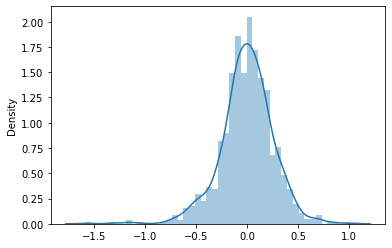

In [188]:
#calculating the residuals with diffrence between y_train & y_pred:
res = y_train - y_train_pred
sns.distplot(res)

## <span style='color:BLUE'> STEP 6 - Predictions & evaluation on the test set useing - RIDGE </span>

In [189]:
# Transform Test Data Set to start the predictions
# Create a list of numeric variables:
num_variable = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Saleprice']

# Fit on Data
df_test[num_variable]= scaler.transform(df_test[num_variable])
df_test.describe()

LotFrontage     LotArea   YearBuilt  YearRemodAdd  MasVnrArea  \
count   439.000000  439.000000  439.000000    439.000000  439.000000   
mean      0.045687    0.008671   -0.005865     -0.019148   -0.021516   
std       1.023945    0.891711    0.988590      1.008023    0.877519   
min      -2.060798   -0.891969   -3.178270     -1.698692   -0.560537   
25%      -0.413161   -0.267006   -0.571542     -0.921799   -0.560537   
50%       0.009310   -0.108217    0.022396      0.389207   -0.560537   
75%       0.431781    0.117445    0.979297      0.923321    0.369275   
max      10.275354   14.414233    1.243269      1.214656    4.361053   

       BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF  ...  \
count  439.000000  439.000000  439.000000   439.000000  439.000000  ...   
mean    -0.032377   -0.068902    0.025916    -0.033111   -0.050044  ...   
std      0.935148    0.798998    0.949447     0.844311    0.902588  ...   
min     -0.964030   -0.293313   -1.256903    -2.314361   -2.098584  ...   
25%     -0.964030   -0.293313   -0.688366    -0.542629   -0.680437  ...   
50%     -0.187498   -0.293313   -0.142124    -0.172157   -0.202692  ...   
75%      0.555693   -0.293313    0.546809     0.405345    0.434720  ...   
max      3.742487    6.306447    3.057292     3.186070    3.408051  ...   

       Yes_CentralAir  \
count      439.000000   
mean         0.949886   
std          0.218429   
min          0.000000   
25%          1.000000   
50%          1.000000   
75%          1.000000   
max          1.000000   

       60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
count                                              439.0                 
mean                                                 0.0                 
std                                                  0.0                 
min                                                  0.0                 
25%                                                  0.0                 
50%                                                  0.0                 
75%                                                  0.0                 
max                                                  0.0                 

       Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical  \
count                                         439.000000                
mean                                            0.070615                
std                                             0.256473                
min                                             0.000000                
25%                                             0.000000                
50%                                             0.000000                
75%                                             0.000000                
max                                             1.000000                

       Mixed_Electrical  Standard Circuit Breakers Romex_Electrical  \
count        439.000000                                  439.000000   
mean           0.004556                                    0.911162   
std            0.067420                                    0.284835   
min            0.000000                                    0.000000   
25%            0.000000                                    1.000000   
50%            0.000000                                    1.000000   
75%            0.000000                                    1.000000   
max            1.000000                                    1.000000   

       Gas forced warm air furnace_Heating  \
count                           439.000000   
mean                              0.979499   
std                               0.141869   
min                               0.000000   
25%                               1.000000   
50%                               1.000000   
75%                               1.000000   
max                               1.000000   

       Gas hot water or steam heat_Heating  Gravity furnace_Heating  \
count

In [190]:
# creating X_train & y_train on Test Set:
y_test = df_test.pop('Saleprice')
X_test = df_test

In [191]:
# Adding Constant to X_Test DF:
X_test_new = sm.add_constant(X_test)
X_test_new.head()

const  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
1436    1.0    -0.413161 -0.144614  -0.010600     -0.679020   -0.560537   
57      1.0     0.812005  0.112107   1.078286      0.923321   -0.560537   
780     1.0    -0.286420 -0.253806   0.781317      0.534875   -0.357475   
382     1.0     0.389534 -0.120835   1.144279      1.020432   -0.560537   
1170    1.0     0.262793 -0.059203   0.187379     -0.387685   -0.560537   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Yes_CentralAir  \
1436    0.361022   -0.293313  -0.703973    -0.431488  ...               1   
57     -0.964030   -0.293313   0.660517    -0.440205  ...               1   
780    -0.964030   -0.293313   1.501060     0.381373  ...               1   
382    -0.964030   -0.293313   0.836652    -0.268044  ...               1   
1170    0.158822   -0.293313   0.022863     0.074099  ...               1   

      60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
1436                                                  0                 
57                                                    0                 
780                                                   0                 
382                                                   0                 
1170                                                  0                 

      Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical  \
1436                                                  0                
57                                                    0                
780                                                   0                
382                                                   0                
1170                                                  0                

      Mixed_Electrical  Standard Circuit Breakers Romex_Electrical  \
1436                 0                                           1   
57                   0                                           1   
780                  0                                           1   
382                  0                                           1   
1170                 0                                           1   

      Gas forced warm air furnace_Heating  \
1436                                    1   
57                                      1   
780                                     1   
382                                     1   
1170                                    1   

      Gas hot water or steam heat_Heating  Gravity furnace_Heating  \
1436                                    0                        0   
57                                      0                        0   
780                                     0                        0   
382                                     0                        0   
1170                                    0                        0   

      Hot water or steam heat other than gas__Heating  Wall Furnace_Heating  
1436                                                0                     0  
57                                                  0                     0  
780                                                 0                     0  
382                                                 0                     0  
1170                                                0                     0  

[5 rows x 276 columns]

In [192]:
# creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_new5.columns]
X_test_new.head()

const  YearBuilt  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1436    1.0  -0.010600    -0.431488 -0.765928 -0.789230  -1.230557   
57      1.0   1.078286    -0.440205 -0.775986  1.186484   0.379709   
780     1.0   0.781317     0.381373  0.212191 -0.789230  -0.498789   
382     1.0   1.144279    -0.268044 -0.577345  1.181889   0.524557   
1170    1.0   0.187379     0.074099 -0.127259 -0.789230  -0.752744   

      2-STORY 1945 & OLDER  2-STORY PUD - 1946 & NEWER  \
1436                     0                           0   
57                       0                           0   
780                      0                           0   
382                      0                           0   
1170                     0                           0   

      PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  Brookside_NH  ...  \
1436                                        0             0  ...   
57                                          0             0  ...   
780                                         0             0  ...   
382                                         0             0  ...   
1170                                        0             0  ...   

      Poor- Severe cracking, settling, or wetness_BsmtCond  \
1436                                                  0      
57                                                    0      
780                                                   0      
382                                                   0      
1170                                                  0      

      Good Exposure_BsmtExpo  Unfinshed_BsmtFinType1  \
1436                       0                       0   
57                         0                       1   
780                        0                       1   
382                        0                       1   
1170                       0                       0   

      No Basement_BsmtFinType2  Poor_HeatingQC  Yes_CentralAir  \
1436                         0               0               1   
57                           0               0               1   
780                          0               0               1   
382                          0               0               1   
1170                         0               0               1   

      60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
1436                                                  0                 
57                                                    0                 
780                                                   0                 
382                                                   0                 
1170                                                  0                 

      Gas forced warm air furnace_Heating  \
1436                                    1   
57                                      1   
780                                     1   
382                                     1   
1170                                    1   

      Gas hot water or steam heat_Heating  Wall Furnace_Heating  
1436                                    0                     0  
57                                      0                     0  
780                                     0                     0  
382                                     0                     0  
1170                                    0                     0  

[5 rows x 70 columns]

In [193]:
# Making predictions
y_pred = lm5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

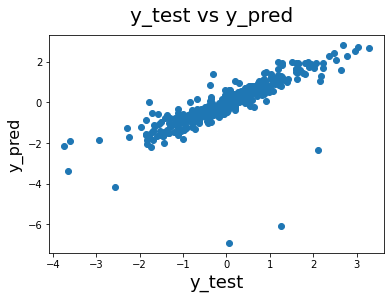

In [194]:
# Plotting y_test & y_pred to understnad the spread:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [195]:
#Calculating R2 Score after useing the model on TEST SET:
r2_score(y_test,y_pred)

0.6024614948119134

## <span style='color:BLUE'> STEP 7 - Building the Lasso Model </span>

In [196]:
# To make a dictironary of Alphas, intiating ridge and assigning CV Folds
lambda_dict_lasso={'alpha':[0, 0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
house_lasso=Lasso()

In [197]:
# Setting the cross validation parameters to fit on X_train & y_train
folds=5
house_crossval_lasso=GridSearchCV(estimator=house_lasso, param_grid=lambda_dict, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
house_crossval_lasso.fit(X_train, y_train)
house_crossval_lasso.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Lasso(alpha=0.0005)

In [198]:
# to create a ridge model
house_lasso=Lasso(0.0005)

## <span style='color:BLUE'> STEP 8 - Training the model on Lasso </span>

In [199]:
# Running RFE with the output number of variables equal to 75:
rfe=RFE(house_lasso, 75)
rfe.fit(X_train, y_train)

RFE(estimator=Lasso(alpha=0.0005), n_features_to_select=75)

In [200]:
# Fetching the list of features selected by the RFE model as per ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 86),
 ('LotArea', False, 5),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 75),
 ('BsmtFinSF1', False, 17),
 ('BsmtFinSF2', False, 46),
 ('BsmtUnfSF', False, 92),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 55),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 10),
 ('BsmtHalfBath', False, 90),
 ('FullBath', False, 29),
 ('HalfBath', False, 39),
 ('BedroomAbvGr', False, 91),
 ('KitchenAbvGr', False, 13),
 ('TotRmsAbvGrd', False, 56),
 ('Fireplaces', False, 81),
 ('GarageYrBlt', False, 44),
 ('GarageCars', True, 1),
 ('GarageArea', False, 30),
 ('WoodDeckSF', False, 36),
 ('OpenPorchSF', False, 58),
 ('EnclosedPorch', False, 62),
 ('3SsnPorch', False, 65),
 ('ScreenPorch', False, 43),
 ('PoolArea', False, 115),
 ('MiscVal', False, 89),
 ('MoSold', False, 87),
 ('YrSold', False, 76),
 ('1-1/2 STORY FINISHED ALL AGES', False, 69),
 ('1-STORY 1945 & OLDER', True, 1),
 ('1-STORY 19

In [201]:
col_lasso = X_train.columns[rfe.support_]
col_lasso

Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', '1-STORY 1945 & OLDER',
       '2-STORY 1945 & OLDER', '2-STORY PUD - 1946 & NEWER', 'Pave_Alley',
       'CulDSac_LotConfig', 'Brookside_NH', 'Clear Creek_NH', 'Crawford_NH',
       'Edwards_NH', 'Meadow Village_NH', 'Northridge Heights_NH',
       'Somerset_NH', 'South & West of Iowa State University_NH',
       'Stone Brook_NH', 'Veenker_NH', 'Adjacent to arterial street_Cond1',
       'Normal_Cond1',
       'Near positive off-site feature--park, greenbelt, etc_Cond2',
       'Below Average_OverallQual', 'Excellent_OverallQual',
       'Fair_OverallQual', 'Good_OverallQual', 'Poor_OverallQual',
       'Very Excellent_OveralQual', 'Very Good_OverallQual',
       'Average_OverallCond', 'Below Average_OverallCond',
       'Excellent_OverallCond', 'Fair_OverallCond', 'Good_OverallCond',
       'Very Good_OverallCond', 'Single-family Detached_BldgType',
       'Mansard_RoofStyle',

In [202]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'Poor_HeatingQC',
       '60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical',
       'Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical',
       'Mixed_Electrical', 'Standard Circuit Breakers Romex_Electrical',
       'Gas forced warm air furnace_Heating',
       'Gas hot water or steam heat_Heating', 'Gravity furnace_Heating',
       'Hot water or steam heat other than gas__Heating',
       'Wall Furnace_Heating'],
      dtype='object', length=200)

In [203]:
#creating X_test dataframe with RFE Selected Variables"
X_train_rfe = X_train[col_lasso]

In [204]:
# Adding a constant varibale:
X_train_rfe = sm.add_constant(X_train_rfe)

In [205]:
# Running the linear model:
lm_lasso = sm.OLS(y_train,X_train_rfe).fit()
lm_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Saleprice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:34:22   Log-Likelihood:                 40.161
No. Observations:                1021   AIC:                             69.68
Df Residuals:                     946   BIC:                             439.3
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                             -1.3746      0.153     -9.002      0.000      -1.674      -1.075
YearBuilt                                                                          0.1550      0.020      7.796      0.000       0.116       0.194
YearRemodAdd                                                                       0.0705      0.013      5.535      0.000       0.046       0.095
TotalBsmtSF                                                                        0.1700      0.018      9.308      0.000       0.134       0.206
1stFlrSF                                                                           0.2312      0.072      3.199      0.001       0.089       0.373
2ndFlrSF                                                                           0.2747      0.078      3.532      0.000       0.122       0.427
GrLivArea                                                                          0.0548      0.094      0.582      0.561      -0.130       0.239
GarageCars                                                                         0.0969      0.011      8.869      0.000       0.075       0.118
1-STORY 1945 & OLDER                                                              -0.2527      0.046     -5.519      0.000      -0.343      -0.163
2-STORY 1945 & OLDER                                                               0.0813      0.049      1.662      0.097      -0.015       0.177
2-STORY PUD - 1946 & NEWER                                                        -0.1600      0.050     -3.199      0.001      -0.258      -0.062
Pave_Alley                                                                         0.0938      0.063      1.492      0.136      -0.030       0.217
CulDSac_LotConfig                                                                  0.0983      0.033      3.014      0.003       0.034       0.162
Brookside_NH                                                                       0.1231      0.044      2.792      0.005       0.037       0.210
Clear Creek_NH                                                                     0.2951      0.059      5.012      0.000       0.180       0.411
Crawford_NH                                                                        0.3478      0.050      7.003      0.000       0.250       0.445
Edwards_NH                                                                        -0.0651      0.033     -1.965      0.050      -0.130   -6.78e-05
Meadow Village_NH                                                                 -0.3817      0.090     -4.226      0.000      -0.559      -0.

## <span style='color:BLUE'> STEP 9 - Residual Analysis on LASSO Model </span>


In [206]:
#Fetching the Y_train_pred values:
y_train_pred_lasso = lm_lasso.predict(X_train_rfe)

<AxesSubplot:ylabel='Density'>

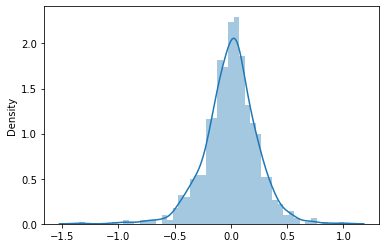

In [207]:
#calculating the residuals with diffrence between y_train & y_pred:
res = y_train - y_train_pred_lasso
sns.distplot(res)

## <span style='color:BLUE'> STEP 10 - Predictions & evaluation on the test set useing - LASSO </span>

In [208]:
# Adding Constant to X_Test DF:
X_test_new_lasso = sm.add_constant(X_test)
X_test_new_lasso.head()

const  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
1436    1.0    -0.413161 -0.144614  -0.010600     -0.679020   -0.560537   
57      1.0     0.812005  0.112107   1.078286      0.923321   -0.560537   
780     1.0    -0.286420 -0.253806   0.781317      0.534875   -0.357475   
382     1.0     0.389534 -0.120835   1.144279      1.020432   -0.560537   
1170    1.0     0.262793 -0.059203   0.187379     -0.387685   -0.560537   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Yes_CentralAir  \
1436    0.361022   -0.293313  -0.703973    -0.431488  ...               1   
57     -0.964030   -0.293313   0.660517    -0.440205  ...               1   
780    -0.964030   -0.293313   1.501060     0.381373  ...               1   
382    -0.964030   -0.293313   0.836652    -0.268044  ...               1   
1170    0.158822   -0.293313   0.022863     0.074099  ...               1   

      60 AMP Fuse Box and mostly knob & tube wiring (poor)_Electrical  \
1436                                                  0                 
57                                                    0                 
780                                                   0                 
382                                                   0                 
1170                                                  0                 

      Fuse Box over 60 AMP and all Romex wiring (Average)_Electrical  \
1436                                                  0                
57                                                    0                
780                                                   0                
382                                                   0                
1170                                                  0                

      Mixed_Electrical  Standard Circuit Breakers Romex_Electrical  \
1436                 0                                           1   
57                   0                                           1   
780                  0                                           1   
382                  0                                           1   
1170                 0                                           1   

      Gas forced warm air furnace_Heating  \
1436                                    1   
57                                      1   
780                                     1   
382                                     1   
1170                                    1   

      Gas hot water or steam heat_Heating  Gravity furnace_Heating  \
1436                                    0                        0   
57                                      0                        0   
780                                     0                        0   
382                                     0                        0   
1170                                    0                        0   

      Hot water or steam heat other than gas__Heating  Wall Furnace_Heating  
1436                                                0                     0  
57                                                  0                     0  
780                                                 0                     0  
382                                                 0                     0  
1170                                                0                     0  

[5 rows x 276 columns]

In [209]:
# creating X_test_new dataframe by dropping variables from X_test
X_test_new_lasso = X_test_new_lasso[X_train_rfe.columns]
X_test_new_lasso.head()

const  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1436    1.0  -0.010600     -0.679020    -0.431488 -0.765928 -0.789230   
57      1.0   1.078286      0.923321    -0.440205 -0.775986  1.186484   
780     1.0   0.781317      0.534875     0.381373  0.212191 -0.789230   
382     1.0   1.144279      1.020432    -0.268044 -0.577345  1.181889   
1170    1.0   0.187379     -0.387685     0.074099 -0.127259 -0.789230   

      GrLivArea  GarageCars  1-STORY 1945 & OLDER  2-STORY 1945 & OLDER  ...  \
1436  -1.230557    0.306009                     0                     0  ...   
57     0.379709    0.306009                     0                     0  ...   
780   -0.498789    0.306009                     0                     0  ...   
382    0.524557    0.306009                     0                     0  ...   
1170  -0.752744   -1.034916                     0                     0  ...   

      Typical Functionality_Functional_Home  Good-90-99 inches_BsmtQual  \
1436                                      1                           0   
57                                        1                           1   
780                                       1                           1   
382                                       1                           1   
1170                                      1                           0   

      Typical-80-89 inches_BsmtQual  Good_BsmtCond  \
1436                              1              0   
57                                0              0   
780                               0              1   
382                               0              0   
1170                              1              0   

      Typical-slight dampness allowed_BsmtCond  Good Exposure_BsmtExpo  \
1436                                         1                       0   
57                                           1                       0   
780                                          0                       0   
382                                          1                       0   
1170                                         1                       0   

      Good Living Quarters_No Basement_BsmtFinType1  Unfinshed_BsmtFinType1  \
1436                                              0                       0   
57                                                0                       1   
780                                               0                       1   
382                                               0                       1   
1170                                              0                       0   

      Below Average Living Quarters_BsmtFinType2  Yes_CentralAir  
1436                                           0               1  
57                                             0               1  
780                                            0               1  
382                                            0               1  
1170                                           0               1  

[5 rows x 76 columns]

In [210]:
# Making predictions
y_pred = lm_lasso.predict(X_test_new_lasso)

Text(0, 0.5, 'y_pred')

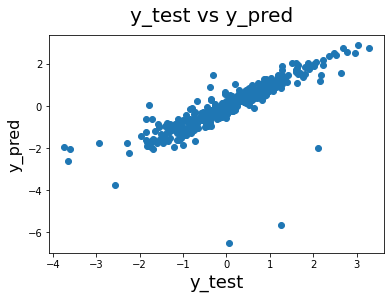

In [211]:
# Plotting y_test & y_pred to understnad the spread:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [212]:
#Calculating R2 Score after useing the model on TEST SET:
r2_score(y_test,y_pred)

0.6517339992266707

## <span style='color:BLUE'> STEP 11 - CONCLUSIONS </span>

In [213]:
##Which variables are significant in predicting the price of a house?
##Below variables are significant in predciting the price of the house:
Significant_Variables=[['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', '1-STORY 1945 & OLDER',
       '2-STORY 1945 & OLDER', '2-STORY PUD - 1946 & NEWER', 'Pave_Alley',
       'CulDSac_LotConfig', 'Brookside_NH', 'Clear Creek_NH', 'Crawford_NH',
       'Edwards_NH', 'Meadow Village_NH', 'Northridge Heights_NH',
       'Somerset_NH', 'South & West of Iowa State University_NH',
       'Stone Brook_NH', 'Veenker_NH', 'Adjacent to arterial street_Cond1',
       'Normal_Cond1',
       'Near positive off-site feature--park, greenbelt, etc_Cond2',
       'Below Average_OverallQual', 'Excellent_OverallQual',
       'Fair_OverallQual', 'Good_OverallQual', 'Poor_OverallQual',
       'Very Excellent_OveralQual', 'Very Good_OverallQual',
       'Average_OverallCond', 'Below Average_OverallCond',
       'Excellent_OverallCond', 'Fair_OverallCond', 'Good_OverallCond',
       'Very Good_OverallCond', 'Single-family Detached_BldgType',
       'Mansard_RoofStyle', 'Brick Face_Ext1st', 'Fair_ExterQual',
       'Good_ExterQual', 'Floating Village Residential_MSZoning',
       'Residential High Density_MSZoning', 'Residential Low Density_MSZoning',
       'Residential Medium Density_MSZoning',
       'Home was not completed when last assessed (associated with New Homes)_SaleCond',
       'Normal Sale_SaleCond', 'Contract Low Down_SaleType',
       'Court Officer Deed/Estate_SaleType',
       'Home just constructed and sold_SaleType',
       'Warranty Deed - Conventional_SaleType', 'Good Wood_Fence',
       'Good_PoolQC', 'Fair_GarageQual', 'Good_GarageQual', 'Fair_GarageCond',
       'No Fireplace__FireplaceQu', 'Poor_FireplaceQu', 'Fair_KitchenQual',
       'Good_KitchenQual', 'Typical/Average_KitchenQual',
       'Minor Deductions 1_Functional_Home',
       'Severely Damaged_Functional_Home',
       'Typical Functionality_Functional_Home', 'Good-90-99 inches_BsmtQual',
       'Typical-80-89 inches_BsmtQual', 'Good_BsmtCond',
       'Typical-slight dampness allowed_BsmtCond', 'Good Exposure_BsmtExpo',
       'Good Living Quarters_No Basement_BsmtFinType1',
       'Unfinshed_BsmtFinType1', 'Below Average Living Quarters_BsmtFinType2',
       'Yes_CentralAir']]

In [214]:
##How well those variables describe the price of a house.
## Out if the 75 variables 46 varibales have a positive co-efficent & 29 variables have a negetive co-efficent with respect to the traget variable "SALEPRICE"


In [215]:
##the optimal value of lambda for ridge and lasso regression.
##Ridge Lambda = 0.2
## Lasso Lambda = 0.0005